# Autotrader_ttr_with_values
---

In [1]:
# import packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# import packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.compose import TransformedTargetRegressor

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read in file

In [2]:
df = pd.read_csv('df_master.csv', index_col=0)
print(df.shape)
df.head()

(14996, 21)


,scr_header,scr_attngrab,scr_descr,scr_sellertype,scr_sellertown,scr_sellerrating,scr_price,scr_url,year,reg_num,...,mileage,engine_size,horsepower,transmission,fuel,ulez,seller_type,price,make,model
0,Audi A4 Avant 2.0 TDI S line Special Edition 5dr,"FULL S/HIST, NEW MOT, EXTRAS","['2008 (57 reg)', 'Estate', '115,000 miles', '...",Trade seller - \nSee all 42 cars,brighton,5.0,"£3,995",/dealers/east-sussex/brighton/browns-autos-100...,2008.0,57.0,...,115000.0,2.0,168.0,manual,diesel,0,trade_seller,3995,audi,a4
1,Audi A3 1.6 TDI Sport Sportback S Tronic 5dr,AUTO!! FSH!!,"['2011 (61 reg)', 'Hatchback', '112,988 miles'...",Trade seller - \nSee all 11 cars,bishop's stortford,4.9,"£4,799",/dealers/hertfordshire/bishops-stortford/watso...,2011.0,61.0,...,112988.0,1.6,104.0,automatic,diesel,0,trade_seller,4799,audi,a3
2,Audi Q3 2.0 TFSI SE quattro 5dr,Immaculate condition Must see,"['2011 (61 reg)', 'SUV', '96,000 miles', '2.0L...",Trade seller - \nSee all 6 cars,stepney,4.8,"£8,740",/dealers/tower-hamlets/stepney/sutsi-cars-1001...,2011.0,61.0,...,96000.0,2.0,168.0,manual,petrol,1,trade_seller,8740,audi,q3
3,Audi A6 TDI ULTRA S LINE 2.0 4dr,Sat Nav Ready,"['2015 (65 reg)', 'Saloon', '97,837 miles', '2...",Trade seller - \nSee all 1450 cars,chatham,4.6,"£10,900",/dealers/kent/chatham/big-motoring-world-10007657,2015.0,65.0,...,97837.0,2.0,190.0,automatic,diesel,1,trade_seller,10900,audi,a6
4,Audi A5 1.8 TFSI Sport 2dr,PARKING SENSORS LEATHER SEATS,"['2009 (58 reg)', 'Coupe', '67,345 miles', '1....",Trade seller - \nSee all 91 cars,wandsworth,5.0,"£6,491",/dealers/borough-of-wandsworth/wandsworth/smar...,2009.0,58.0,...,67345.0,1.8,168.0,manual,petrol,1,trade_seller,6491,audi,a5


In [3]:
df.columns

Index(['scr_header', 'scr_attngrab', 'scr_descr', 'scr_sellertype',
       'scr_sellertown', 'scr_sellerrating', 'scr_price', 'scr_url', 'year',
       'reg_num', 'body', 'mileage', 'engine_size', 'horsepower',
       'transmission', 'fuel', 'ulez', 'seller_type', 'price', 'make',
       'model'],
      dtype='object')

In [4]:
df = df[['year', 'body', 'mileage', 'engine_size', 'horsepower', 
        'transmission', 'fuel', 'ulez', 'seller_type', 'price', 'make', 'model']]
df.head()

,year,body,mileage,engine_size,horsepower,transmission,fuel,ulez,seller_type,price,make,model
0,2008.0,estate,115000.0,2.0,168.0,manual,diesel,0,trade_seller,3995,audi,a4
1,2011.0,hatchback,112988.0,1.6,104.0,automatic,diesel,0,trade_seller,4799,audi,a3
2,2011.0,suv,96000.0,2.0,168.0,manual,petrol,1,trade_seller,8740,audi,q3
3,2015.0,saloon,97837.0,2.0,190.0,automatic,diesel,1,trade_seller,10900,audi,a6
4,2009.0,coupe,67345.0,1.8,168.0,manual,petrol,1,trade_seller,6491,audi,a5


In [5]:
df['log_price'] = np.log(df.price)
df.head()

,year,body,mileage,engine_size,horsepower,transmission,fuel,ulez,seller_type,price,make,model,log_price
0,2008.0,estate,115000.0,2.0,168.0,manual,diesel,0,trade_seller,3995,audi,a4,8.292799
1,2011.0,hatchback,112988.0,1.6,104.0,automatic,diesel,0,trade_seller,4799,audi,a3,8.476163
2,2011.0,suv,96000.0,2.0,168.0,manual,petrol,1,trade_seller,8740,audi,q3,9.075665
3,2015.0,saloon,97837.0,2.0,190.0,automatic,diesel,1,trade_seller,10900,audi,a6,9.296518
4,2009.0,coupe,67345.0,1.8,168.0,manual,petrol,1,trade_seller,6491,audi,a5,8.778172


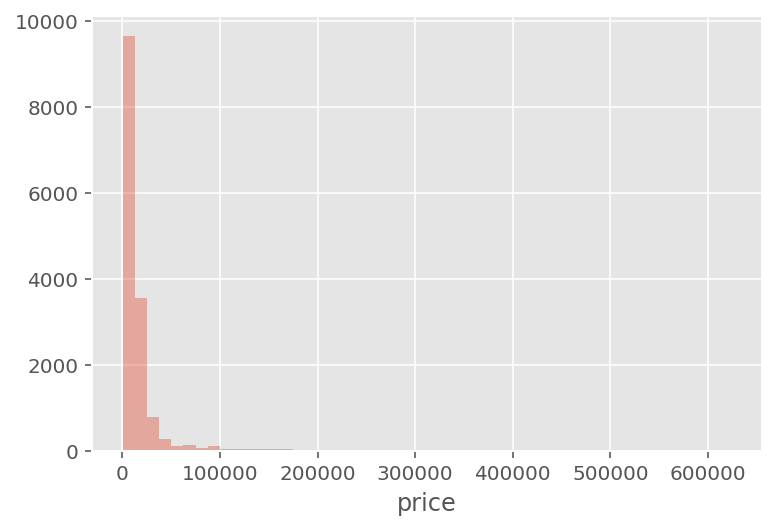

In [6]:
sns.distplot(df.price, kde=False);

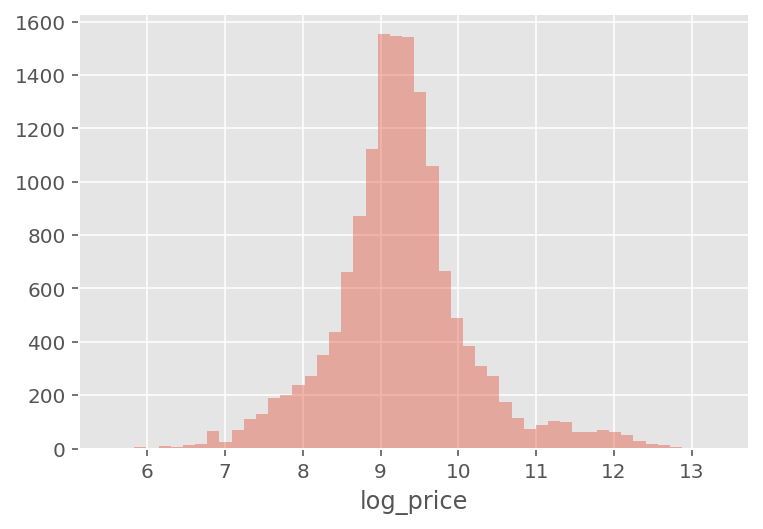

In [7]:
sns.distplot(df.log_price, kde=False);

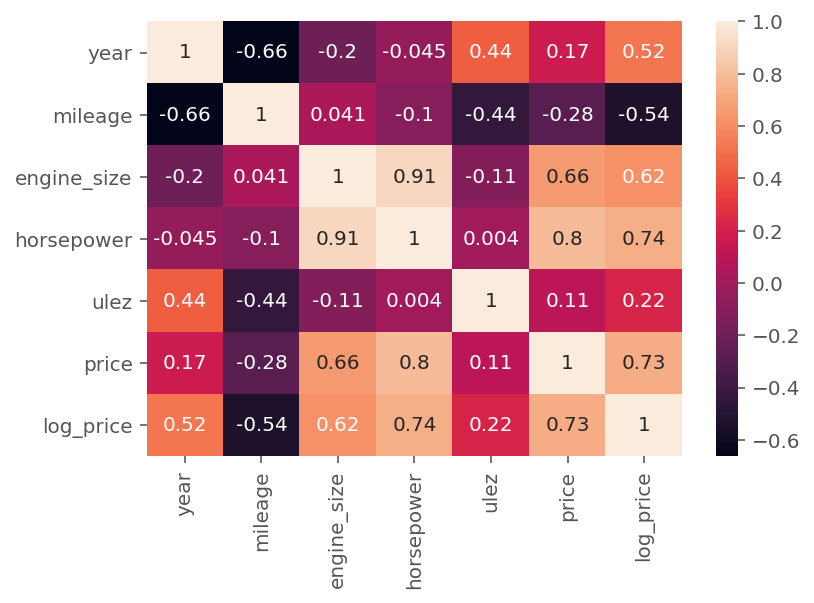

In [8]:
sns.heatmap(df.corr(), annot=True);

In [9]:
df.drop(columns=['model', 'engine_size'], inplace=True)
df.head(3)

,year,body,mileage,horsepower,transmission,fuel,ulez,seller_type,price,make,log_price
0,2008.0,estate,115000.0,168.0,manual,diesel,0,trade_seller,3995,audi,8.292799
1,2011.0,hatchback,112988.0,104.0,automatic,diesel,0,trade_seller,4799,audi,8.476163
2,2011.0,suv,96000.0,168.0,manual,petrol,1,trade_seller,8740,audi,9.075665


In [10]:
# dummify categorial variables
features_categorical = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make']
df = pd.get_dummies(df, columns=features_categorical, drop_first=True)

df.head(3)

,year,mileage,horsepower,price,log_price,body_combi van,body_convertible,body_coupe,body_estate,body_hatchback,...,make_skoda,make_smart,make_ssangyong,make_subaru,make_suzuki,make_toyota,make_tvr,make_vauxhall,make_volkswagen,make_volvo
0,2008.0,115000.0,168.0,3995,8.292799,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2011.0,112988.0,104.0,4799,8.476163,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,96000.0,168.0,8740,9.075665,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.columns

Index(['year', 'mileage', 'horsepower', 'price', 'log_price', 'body_combi van',
       'body_convertible', 'body_coupe', 'body_estate', 'body_hatchback',
       'body_limousine', 'body_mpv', 'body_panel van', 'body_pickup',
       'body_saloon', 'body_suv', 'body_window van', 'transmission_manual',
       'fuel_petrol', 'ulez_1', 'make_alfaromeo', 'make_alpine',
       'make_astonmartin', 'make_audi', 'make_bentley', 'make_bmw',
       'make_cadillac', 'make_caterham', 'make_chevrolet', 'make_chrysler',
       'make_citroen', 'make_cupra', 'make_dacia', 'make_daewoo',
       'make_daihatsu', 'make_dodge', 'make_ds', 'make_ferrari', 'make_fiat',
       'make_ford', 'make_greatwall', 'make_honda', 'make_hyundai',
       'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia',
       'make_lamborghini', 'make_landrover', 'make_lexus', 'make_london',
       'make_lotus', 'make_maserati', 'make_maybach', 'make_mazda',
       'make_mclaren', 'make_mercedes-benz', 'make_mg', 'ma

In [12]:
# set features and target
X = df.copy()
y = X.pop('price')
X.columns

Index(['year', 'mileage', 'horsepower', 'log_price', 'body_combi van',
       'body_convertible', 'body_coupe', 'body_estate', 'body_hatchback',
       'body_limousine', 'body_mpv', 'body_panel van', 'body_pickup',
       'body_saloon', 'body_suv', 'body_window van', 'transmission_manual',
       'fuel_petrol', 'ulez_1', 'make_alfaromeo', 'make_alpine',
       'make_astonmartin', 'make_audi', 'make_bentley', 'make_bmw',
       'make_cadillac', 'make_caterham', 'make_chevrolet', 'make_chrysler',
       'make_citroen', 'make_cupra', 'make_dacia', 'make_daewoo',
       'make_daihatsu', 'make_dodge', 'make_ds', 'make_ferrari', 'make_fiat',
       'make_ford', 'make_greatwall', 'make_honda', 'make_hyundai',
       'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia',
       'make_lamborghini', 'make_landrover', 'make_lexus', 'make_london',
       'make_lotus', 'make_maserati', 'make_maybach', 'make_mazda',
       'make_mclaren', 'make_mercedes-benz', 'make_mg', 'make_mini',

In [13]:
y = X.pop('log_price')

display(X.head(3))
print(y[:3])

,year,mileage,horsepower,body_combi van,body_convertible,body_coupe,body_estate,body_hatchback,body_limousine,body_mpv,...,make_skoda,make_smart,make_ssangyong,make_subaru,make_suzuki,make_toyota,make_tvr,make_vauxhall,make_volkswagen,make_volvo
0,2008.0,115000.0,168.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011.0,112988.0,104.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,96000.0,168.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    8.292799
1    8.476163
2    9.075665
Name: log_price, dtype: float64


In [14]:
X.columns

Index(['year', 'mileage', 'horsepower', 'body_combi van', 'body_convertible',
       'body_coupe', 'body_estate', 'body_hatchback', 'body_limousine',
       'body_mpv', 'body_panel van', 'body_pickup', 'body_saloon', 'body_suv',
       'body_window van', 'transmission_manual', 'fuel_petrol', 'ulez_1',
       'make_alfaromeo', 'make_alpine', 'make_astonmartin', 'make_audi',
       'make_bentley', 'make_bmw', 'make_cadillac', 'make_caterham',
       'make_chevrolet', 'make_chrysler', 'make_citroen', 'make_cupra',
       'make_dacia', 'make_daewoo', 'make_daihatsu', 'make_dodge', 'make_ds',
       'make_ferrari', 'make_fiat', 'make_ford', 'make_greatwall',
       'make_honda', 'make_hyundai', 'make_infiniti', 'make_isuzu',
       'make_jaguar', 'make_jeep', 'make_kia', 'make_lamborghini',
       'make_landrover', 'make_lexus', 'make_london', 'make_lotus',
       'make_maserati', 'make_maybach', 'make_mazda', 'make_mclaren',
       'make_mercedes-benz', 'make_mg', 'make_mini', 'make_mitsub

In [15]:
y

0        8.292799
1        8.476163
2        9.075665
3        9.296518
4        8.778172
           ...   
16194    9.667702
16195    9.635608
16196    9.157994
16197    9.082507
16198    9.375770
Name: log_price, Length: 14996, dtype: float64

# Linear Regression
---

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [17]:
tt = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)

In [18]:
tt = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)
tt.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [19]:
# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
def print_scores(model=tt, train=X_train, test=X_test):
    '''print scores for train, test, CV mean'''
    
    print('Train score: ', model.score(train, y_train))
    print('Test score:  ', model.score(test, y_test))
    print('CV mean:     ', cross_val_score(model, train, y_train, cv=5).mean())

In [21]:
print_scores(tt)

Train score:  0.820952694873783
Test score:   0.8641048224550152
CV mean:      0.8136887506184349


In [22]:
print_scores(lr)

Train score:  0.7860029817668903
Test score:   0.7868799796463503
CV mean:      -3.4989008887925954e+21


# plot functions

In [22]:
def plot_predictions(model=lr, train=X_train, test=X_test):
    '''plot predictions'''
    # model predictions
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    # max limits for plots
    max_train = [y_train.max() if y_train.max() > pred_train.max() else pred_train.max()][0]
    max_test = [y_test.max() if y_test.max() > pred_test.max() else pred_test.max()][0]

    # predictions against actual plots
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    sns.regplot(x=pred_train, y=y_train, color='blue', ax=ax[0])
    sns.regplot(x=pred_test, y=y_test, color='blue', ax=ax[1])
    
    ax[0].plot([0,max_train], [0,max_train], color='red')
    ax[1].plot([0,max_test], [0,max_test], color='red')

    ax[0].set_title('Actual / Predicted (Train)')
    ax[0].set_xlabel('Predicted Price (GBP)')
    ax[0].set_ylabel('Actual Price (GBP)')    
    ax[1].set_title('Actual / Predicted (Test)')
    ax[1].set_xlabel('Predicted Price (GBP)')
    ax[1].set_ylabel('Actual Price (GBP)')
    
    print('Predictions:')
    plt.show()
    
def plot_residuals(model=lr, train=X_train, test=X_test):
    '''plot residuals'''

    # model predictions
    pred_train = model.predict(train)
    pred_test = model.predict(test)

    # residuals
    res_train = y_train - pred_train
    res_test = y_test - pred_test

    # standardized residuals
    res_train_std = (res_train - res_train.mean()) / res_train.std()
    res_test_std = (res_test - res_test.mean()) / res_test.std()    

    # plot residuals
    fig, ax = plt.subplots(3,2, figsize=(16,14))
    plt.tight_layout(pad=5)

    # train
    sns.distplot(res_train, kde=False, color='blue', ax=ax[0,0])
    sns.boxplot(res_train, color='blue', ax=ax[1,0])
    sns.scatterplot(x=pred_train, y=res_train_std, color='blue', ax=ax[2,0])

    # test
    sns.distplot(res_test, kde=False, color='blue', ax=ax[0,1])
    sns.boxplot(res_test, color='blue', ax=ax[1,1])
    sns.scatterplot(x=pred_test, y=res_test_std, color='blue', ax=ax[2,1])

    # labels
    ax[0,0].set_title('Residuals (Train)')
    ax[0,0].set_ylabel('Occurences')    
    ax[2,0].set_title('Standardised Residuals (Train)')  
    ax[2,0].set_xlabel('Predicted Price (GBP)')  
    ax[2,0].set_ylabel("Standardised Residual (st dev's)")  
        
    ax[0,1].set_title('Residuals (Test)')
    ax[0,1].set_ylabel('Occurences')    
    ax[2,1].set_title('Standardised Residuals (Test)')
    ax[2,1].set_xlabel('Predicted Price (GBP)')  
    ax[2,1].set_ylabel("Standardised Residual (st dev's)")  

    print('Distribution of residuals:')
    plt.show()
    
def plot_coefficients(model=lr, train=X_train, test=X_test):
    '''plot coefficients from a model'''
    # df for model coefficients
    df_model_coef = pd.DataFrame(model.coef_, index=train.columns, columns=['coef'])
    df_model_coef['coef_abs'] = np.abs(df_model_coef)

    # plot coefficients in order of importance
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    plt.tight_layout(w_pad=10)

    df_model_coef.coef.sort_values()[:10].plot(kind='barh', ax=ax[0])
    df_model_coef.coef.sort_values()[-10:].plot(kind='barh', ax=ax[1])

    ax[0].set_title('Feature Importance (negative impact)')
    ax[1].set_title('Feature Importance (positive impact)')

    print('Coefficients:')
    plt.show()
    
def plot_all(model=lr, train=X_train, test=X_test):
    plot_predictions(model=model, train=train, test=test)
    plot_residuals(model=model, train=train, test=test)
    plot_coefficients(model=model, train=train, test=test)

Predictions:


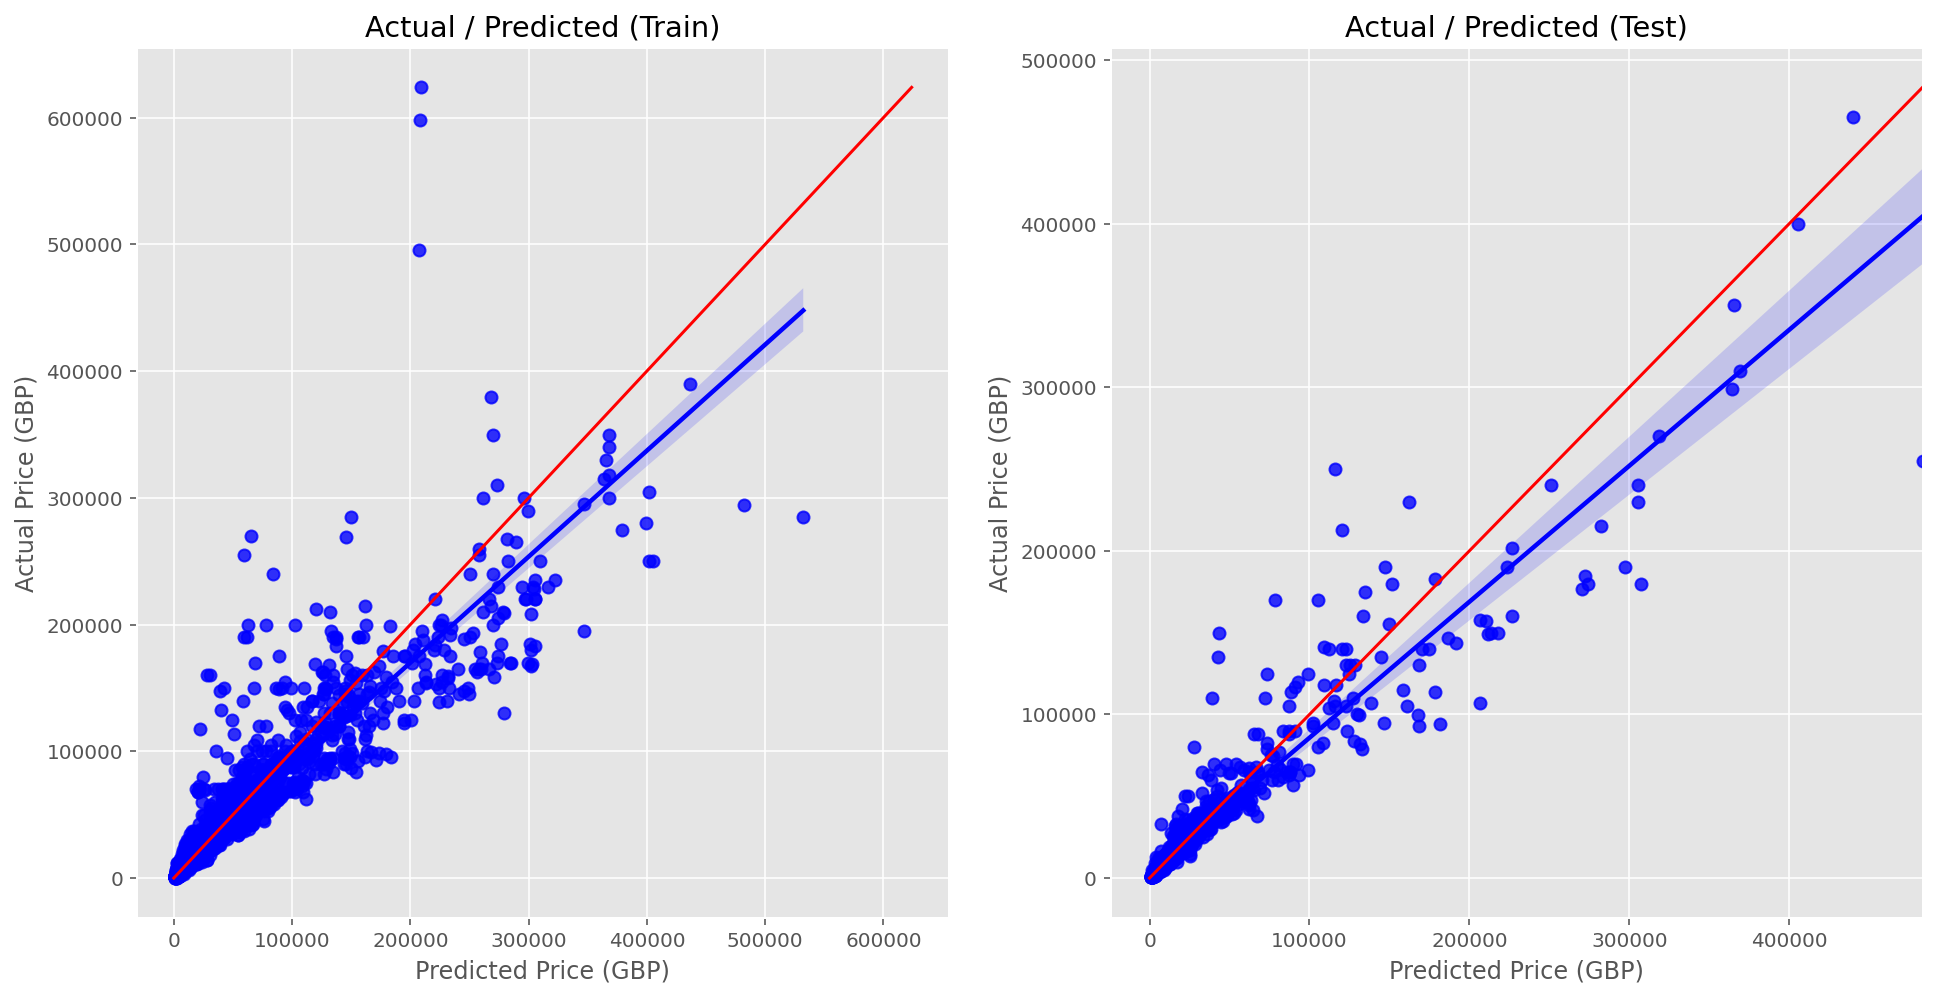

Distribution of residuals:


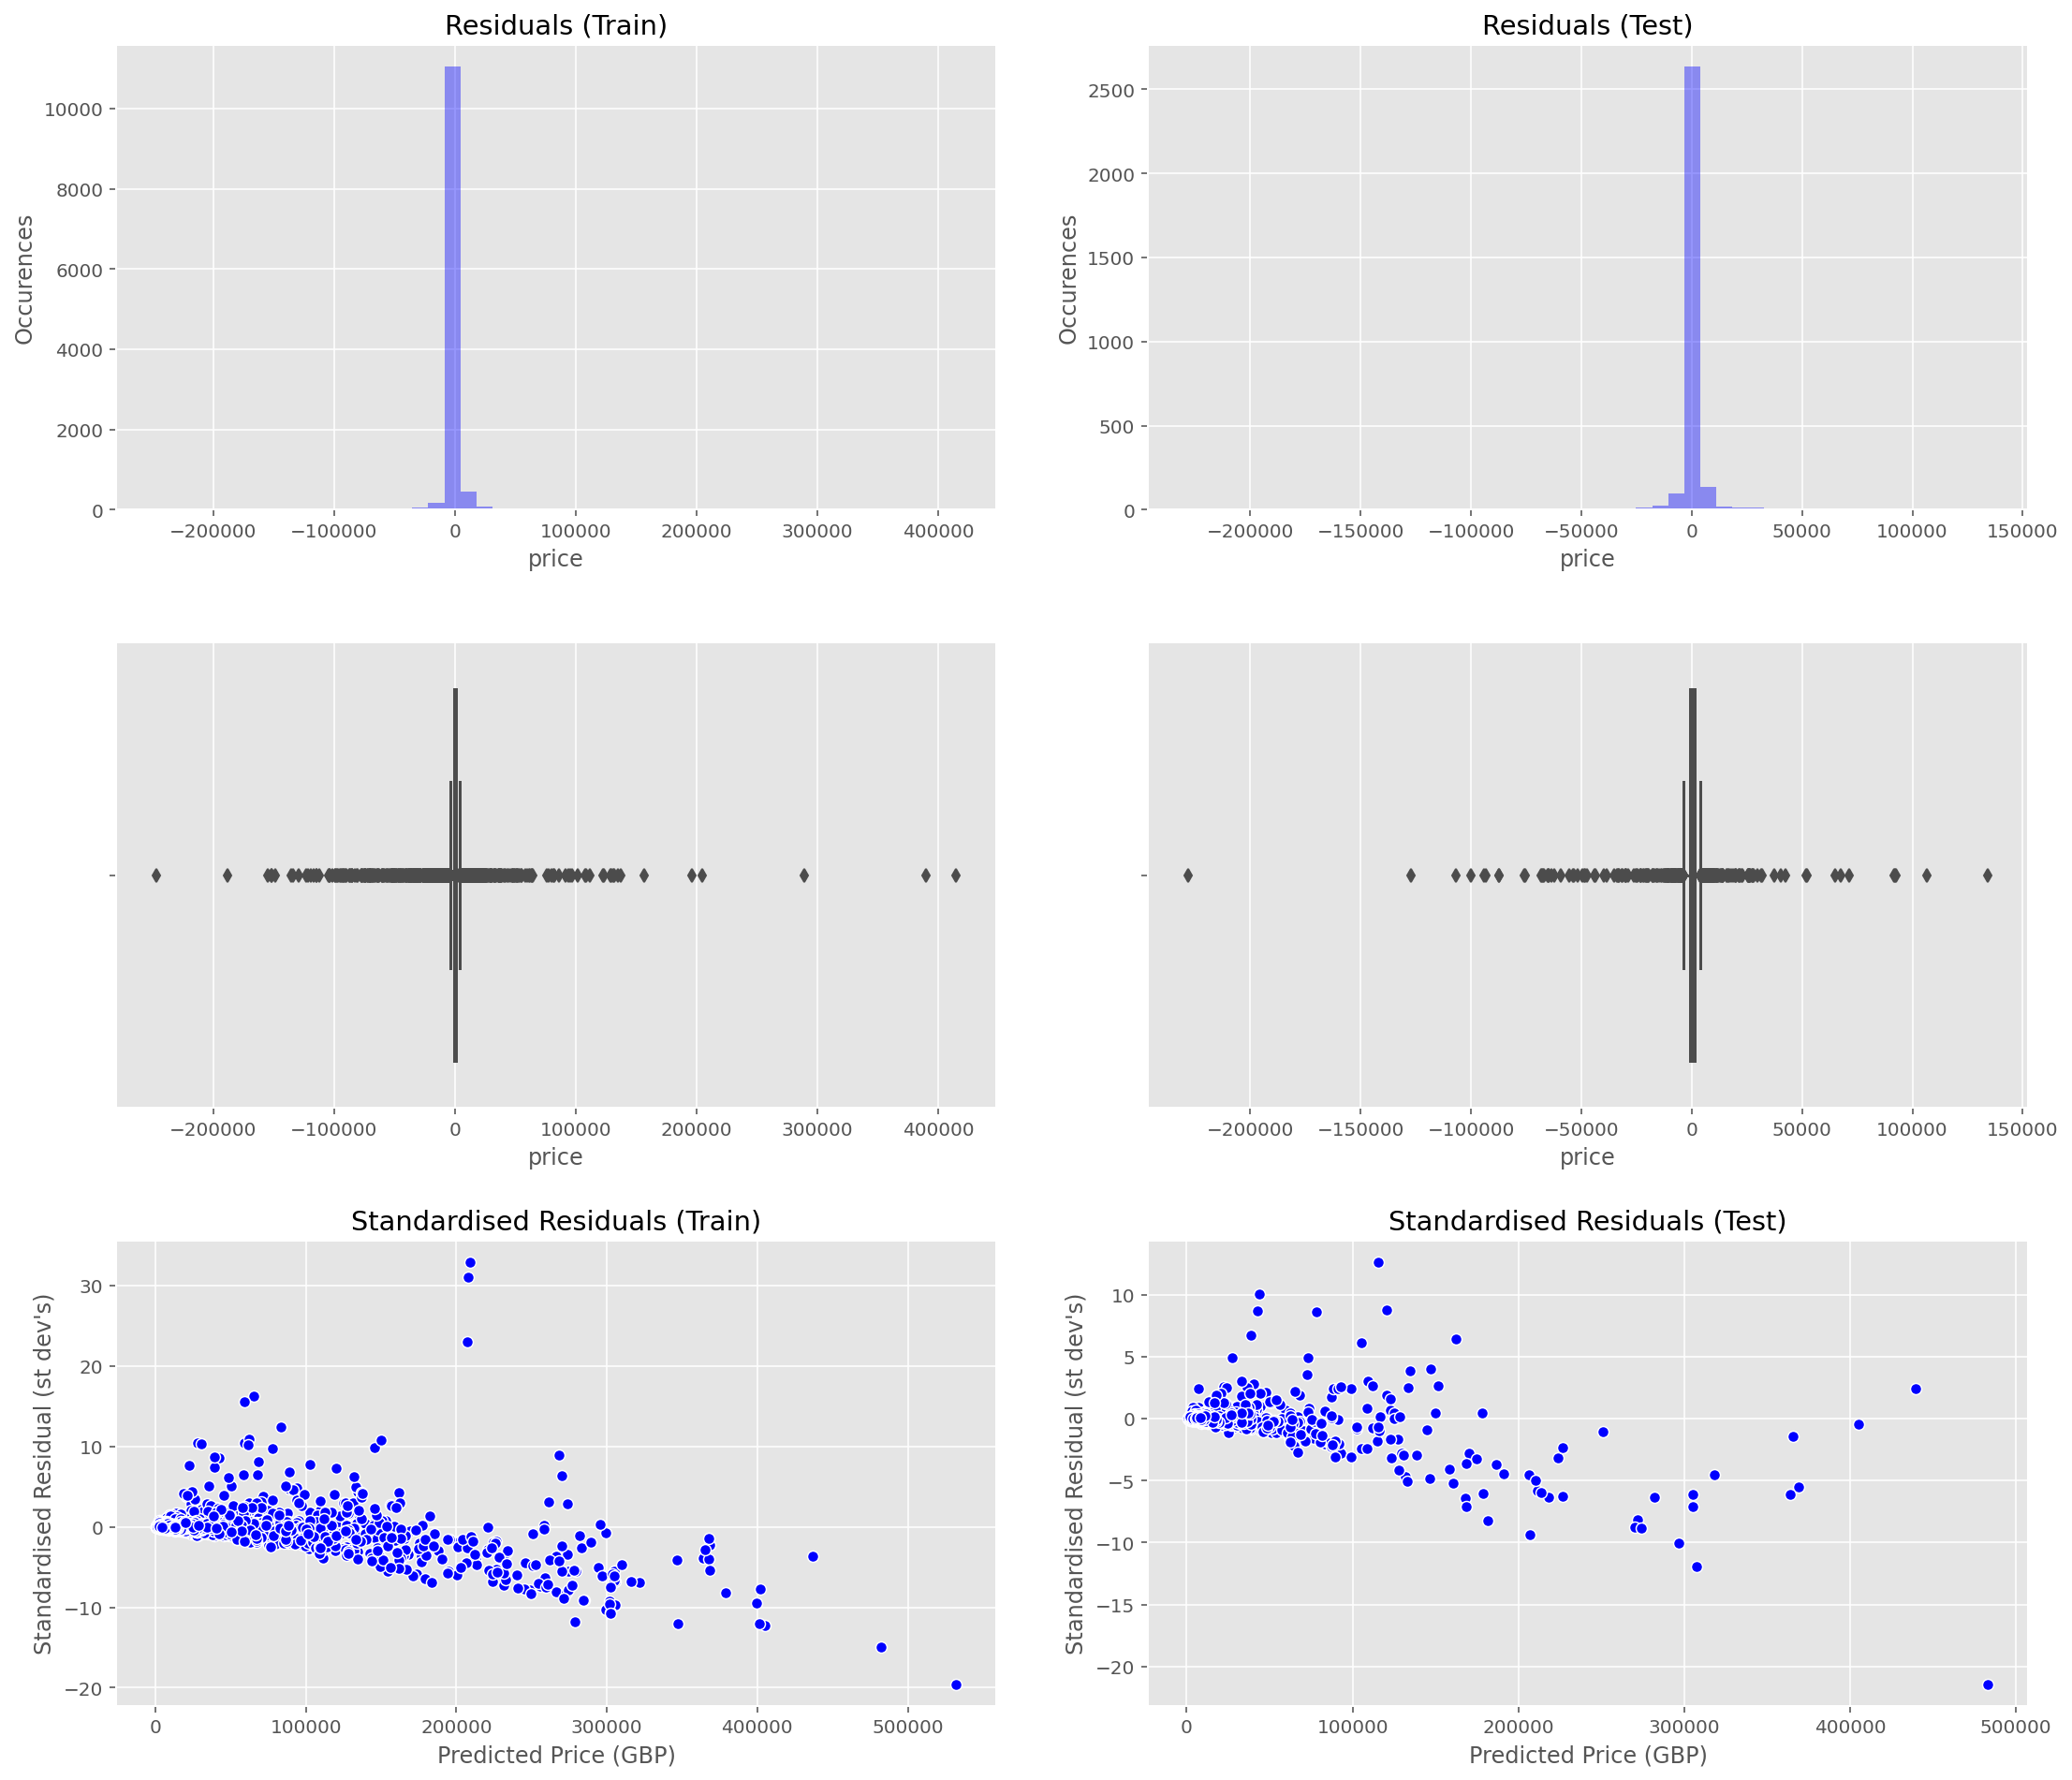

AttributeError: 'TransformedTargetRegressor' object has no attribute 'coef_'

In [23]:
plot_all(tt)

Predictions:


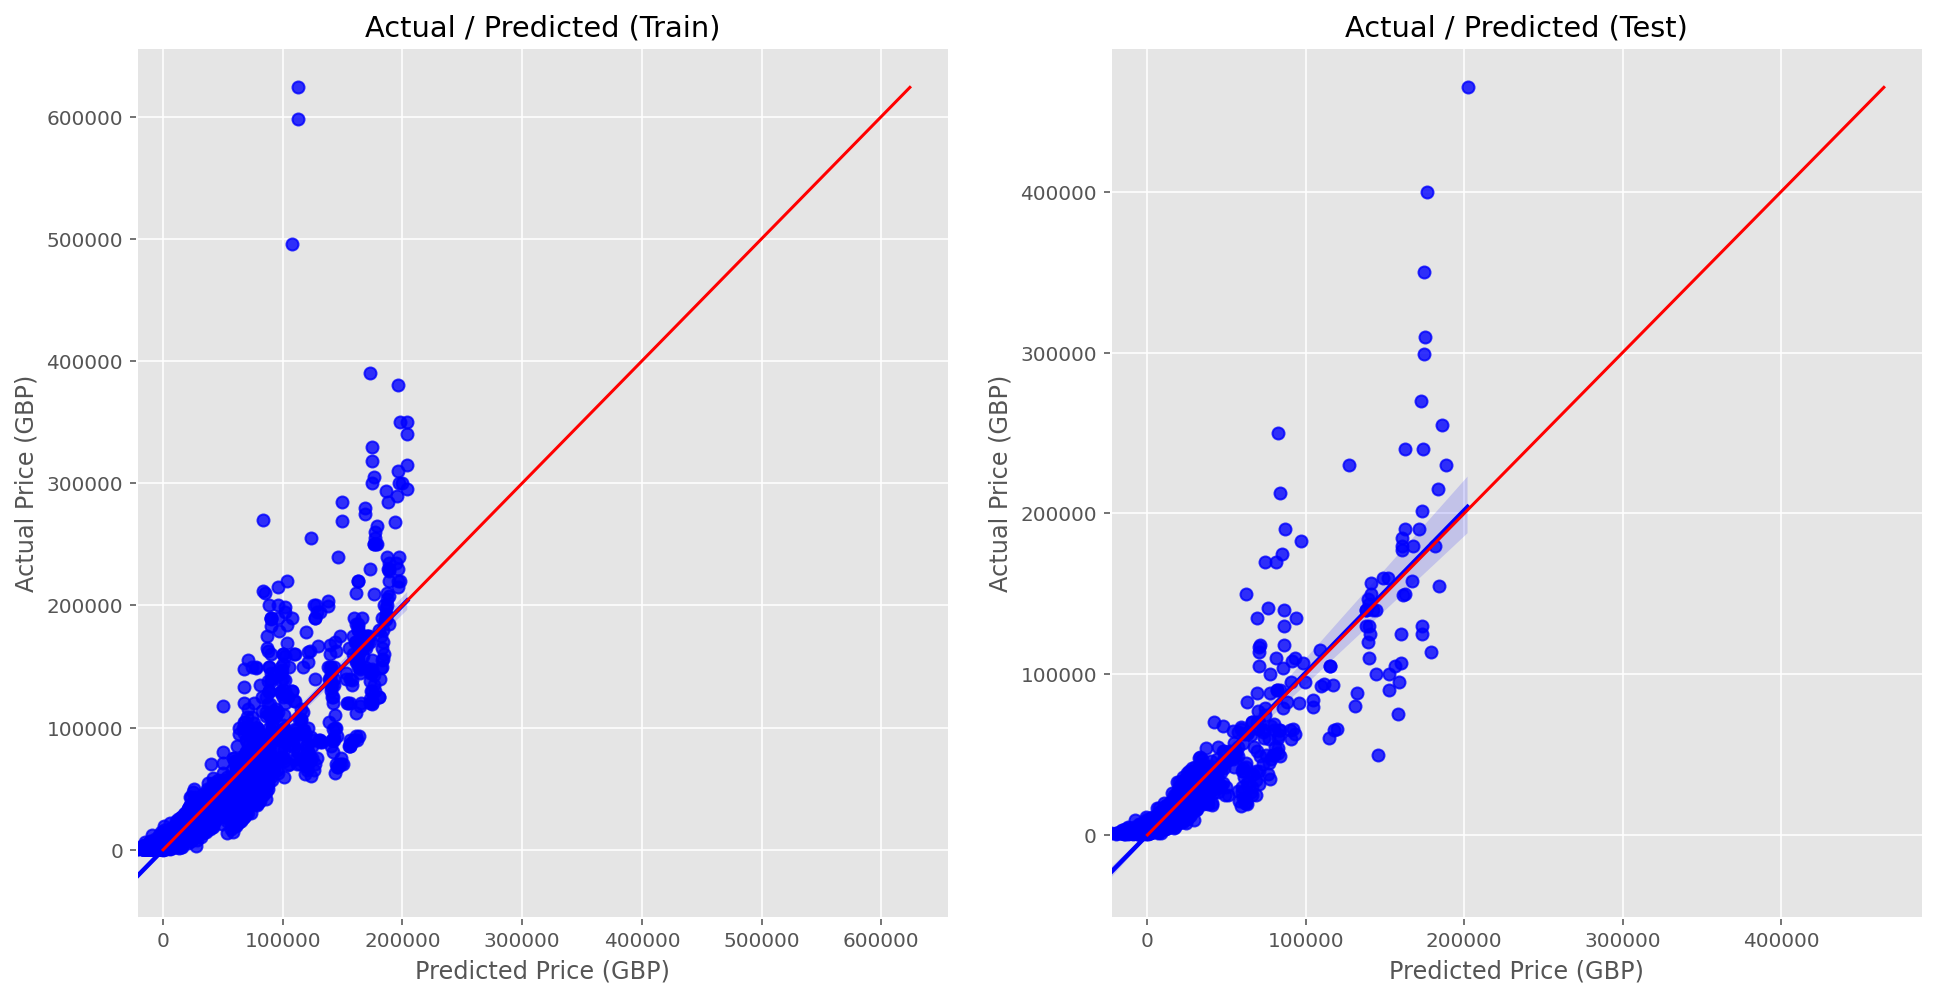

Distribution of residuals:


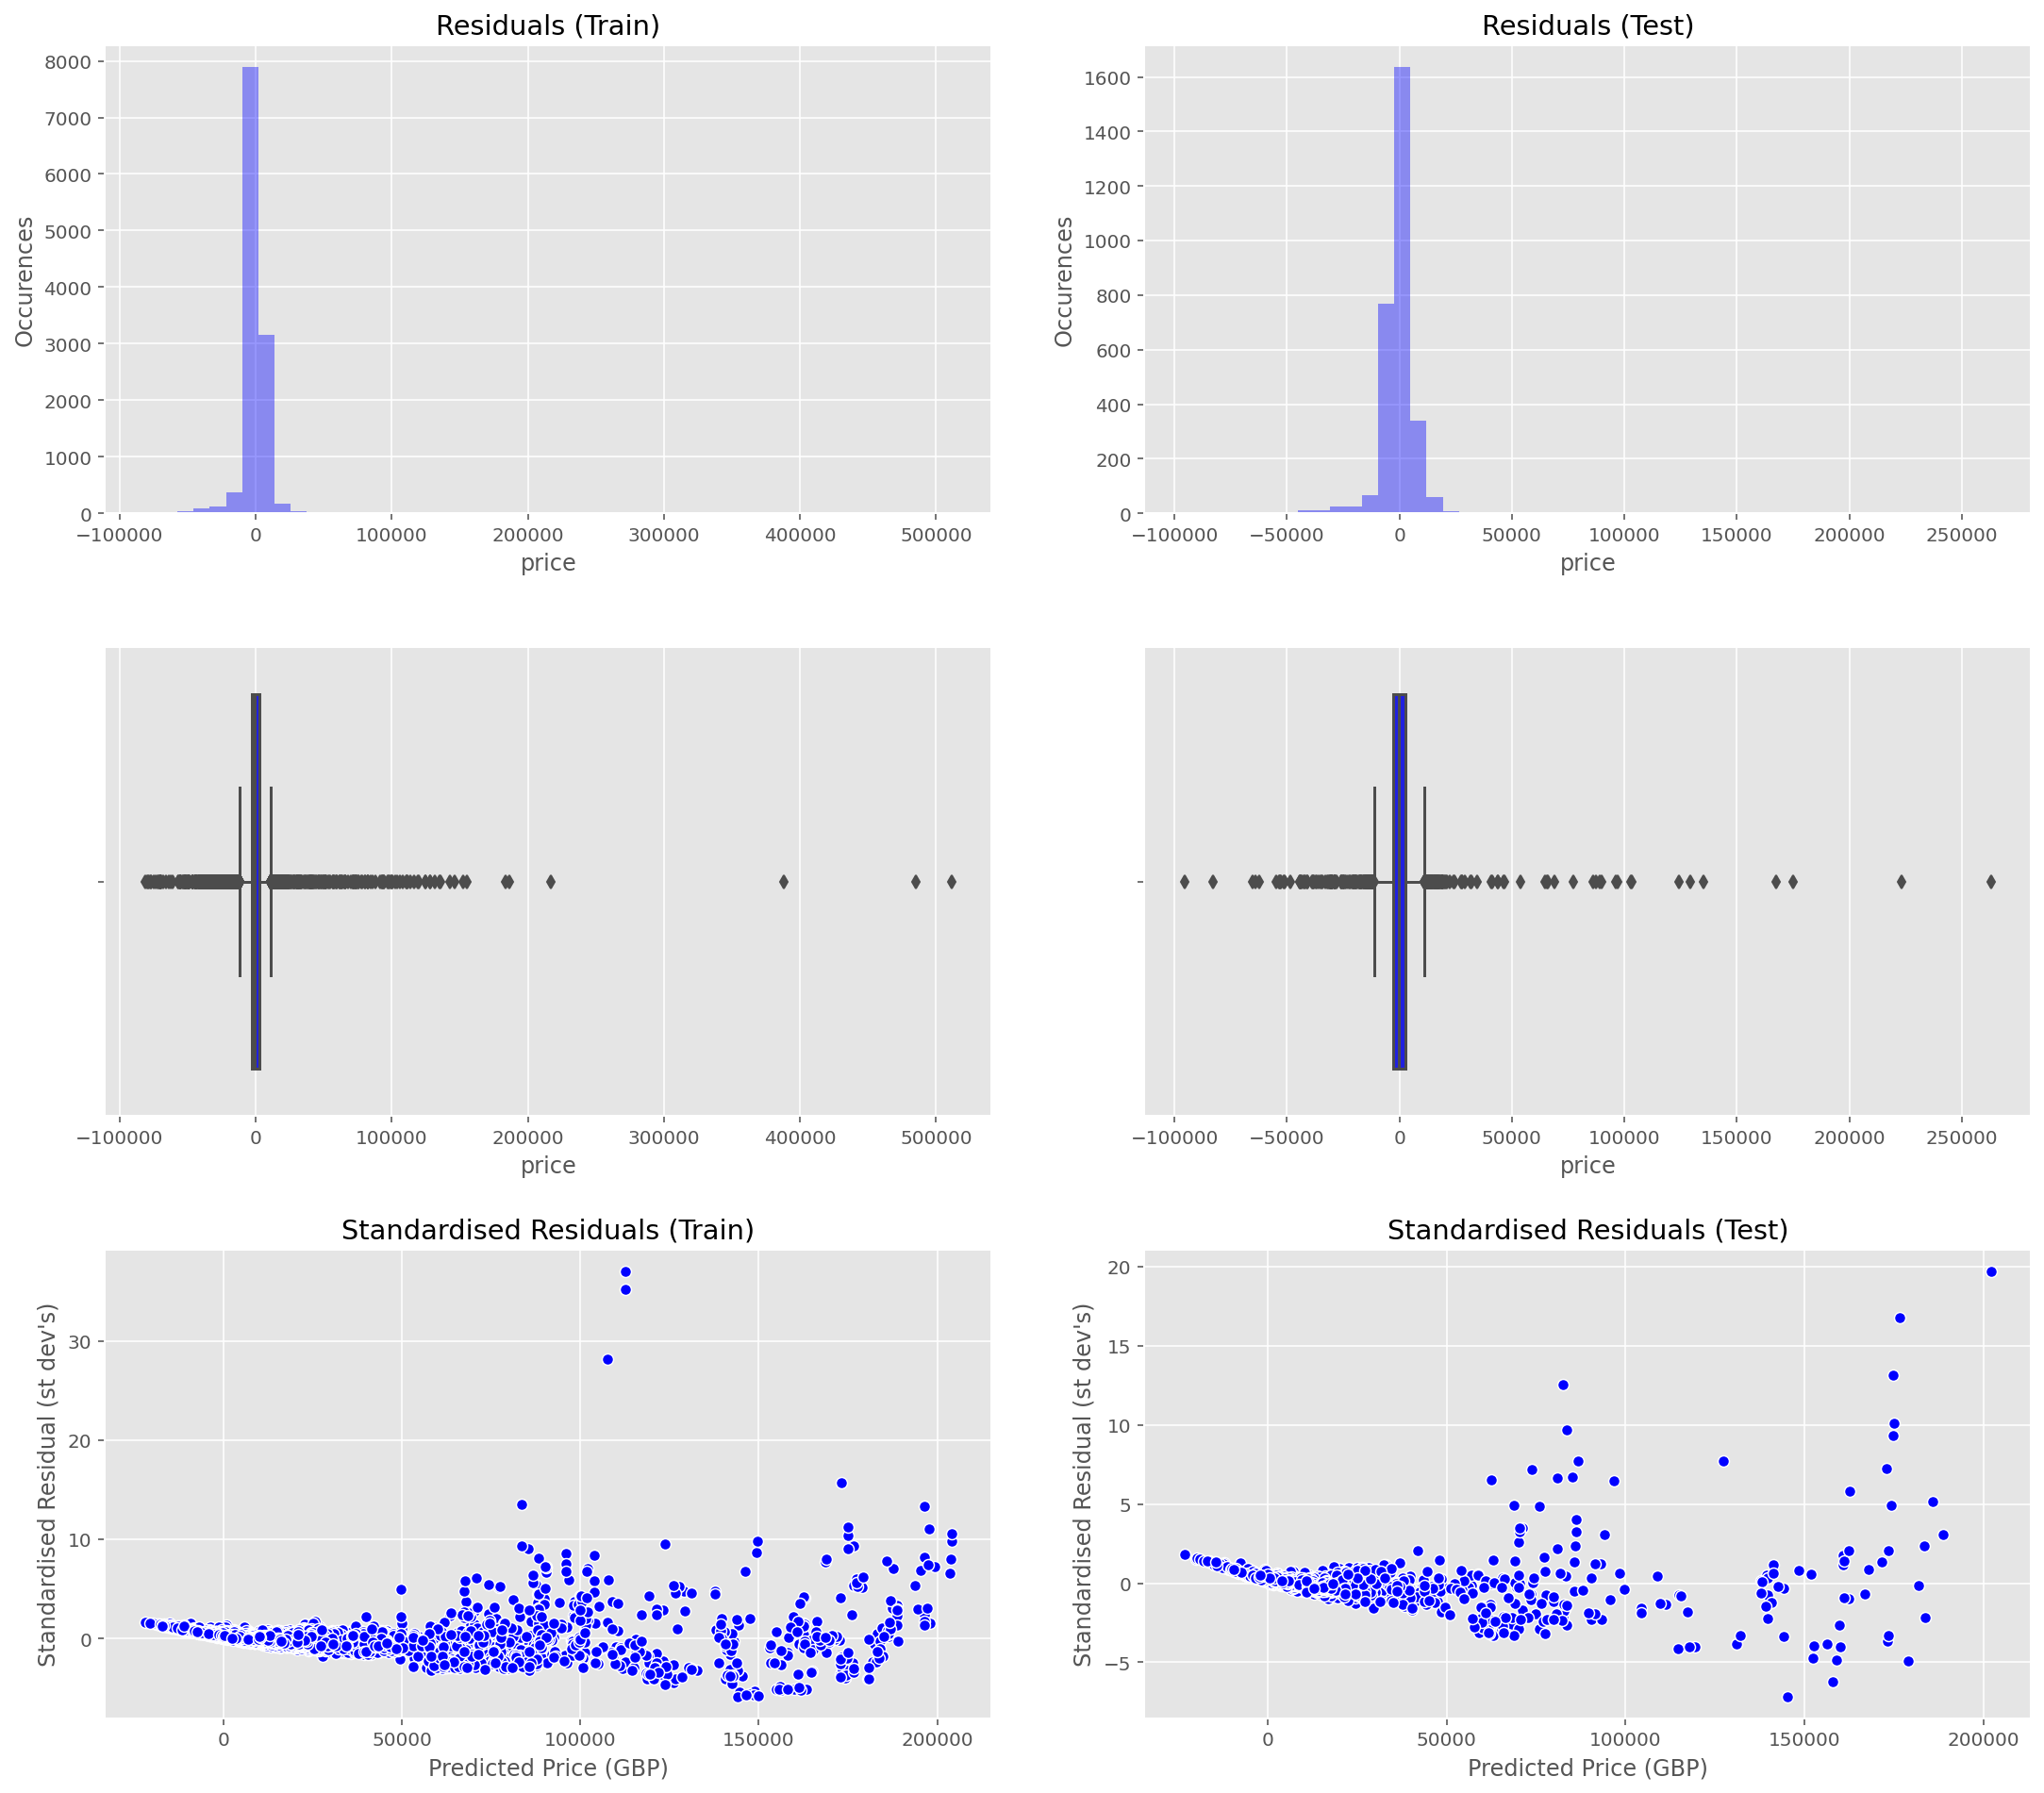

Coefficients:


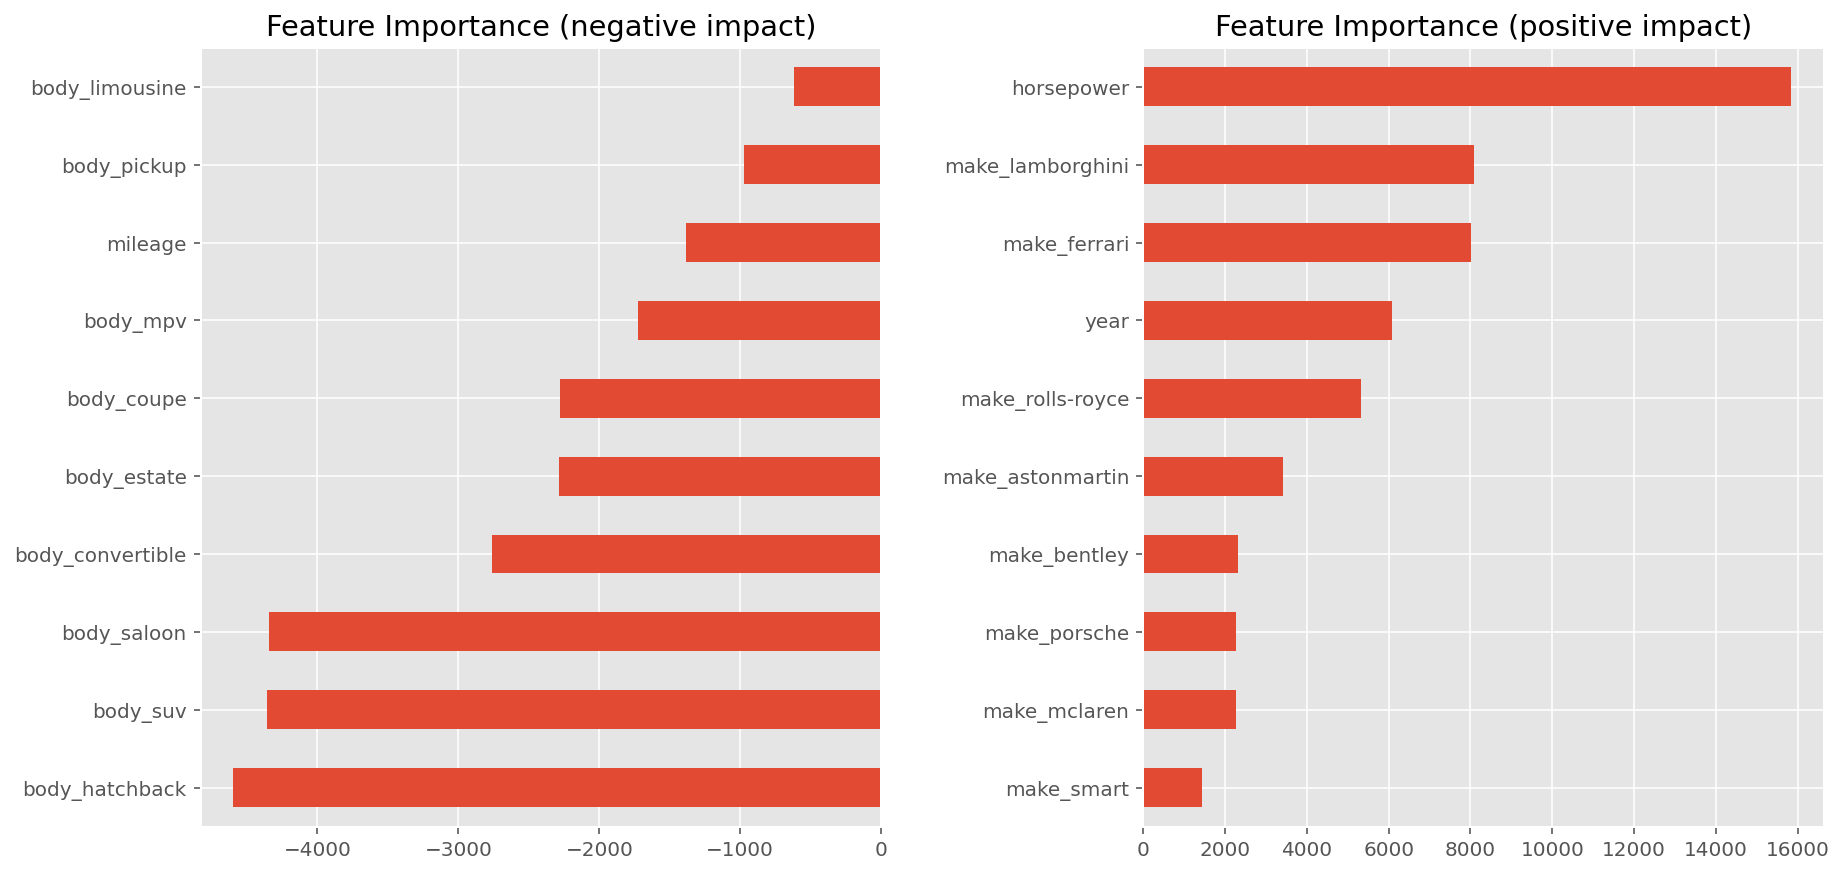

In [24]:
plot_all(lr)

Coefficients:


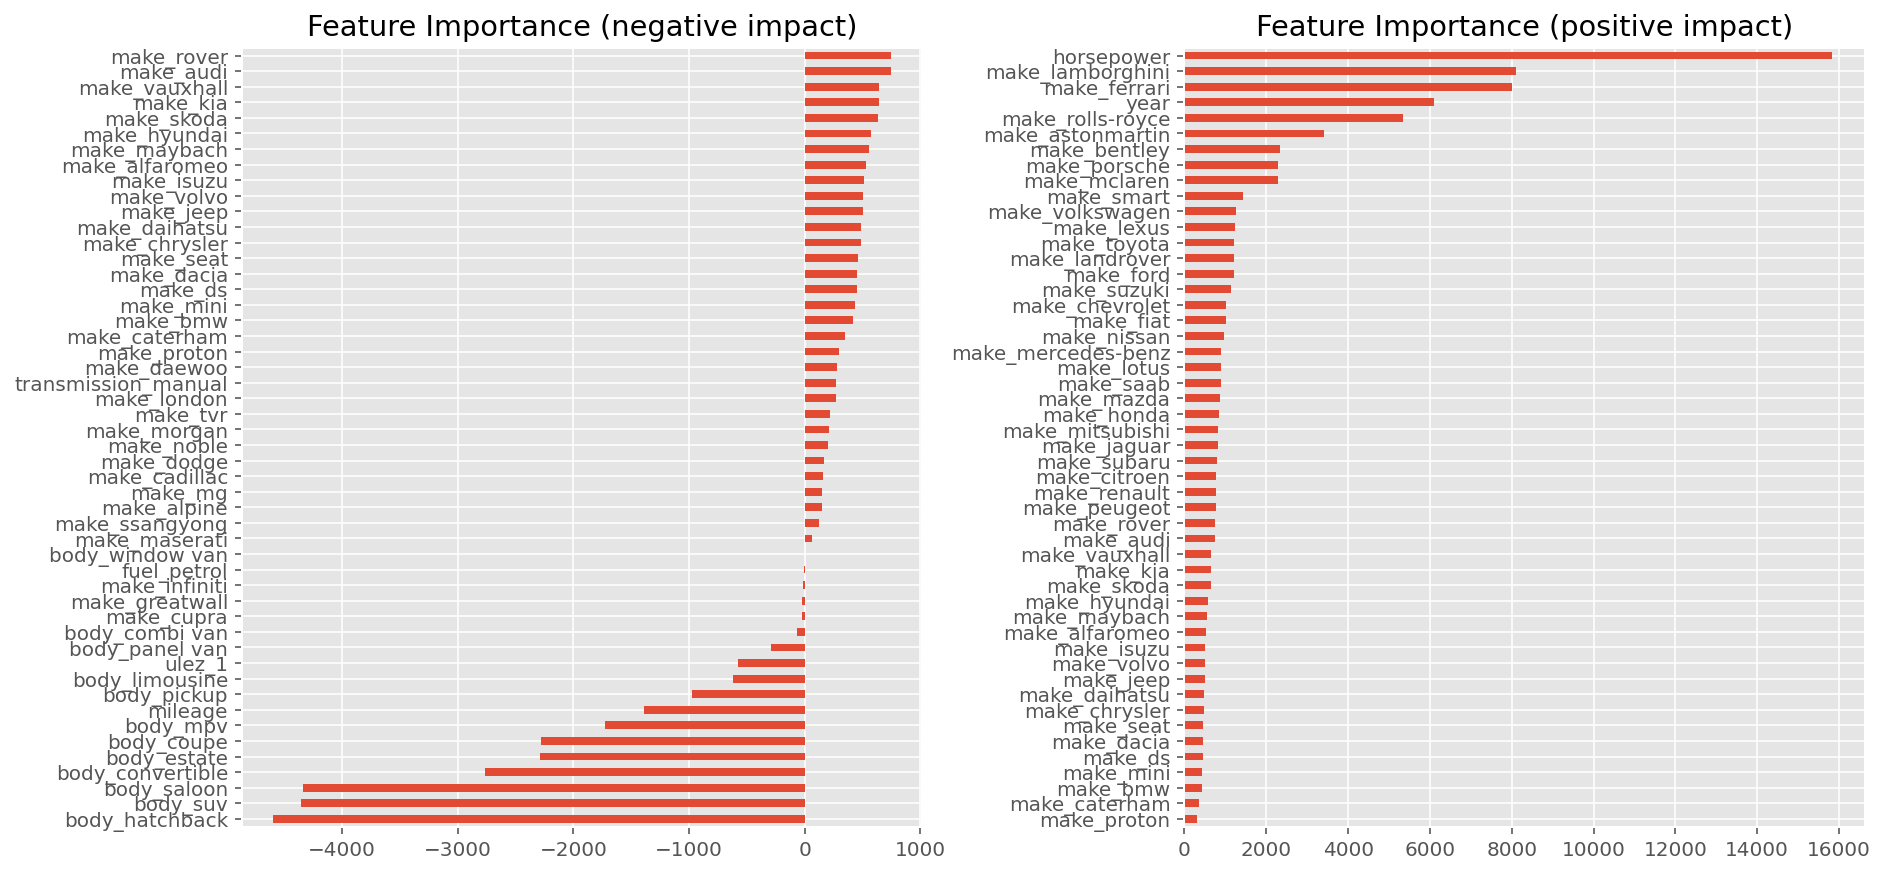

In [63]:
model, train, test = lr, X_train, X_test

# df for model coefficients
df_model_coef = pd.DataFrame(model.coef_, index=train.columns, columns=['coef'])
df_model_coef['coef_abs'] = np.abs(df_model_coef)

# plot coefficients in order of importance
fig, ax = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(w_pad=10)

df_model_coef.coef.sort_values()[:50].plot(kind='barh', ax=ax[0])
df_model_coef.coef.sort_values()[-50:].plot(kind='barh', ax=ax[1])

ax[0].set_title('Feature Importance (negative impact)')
ax[1].set_title('Feature Importance (positive impact)')

print('Coefficients:')
plt.show()

# Ridge

In [64]:
ridgecv = RidgeCV(alphas=np.logspace(-4,4,10), cv=5)
ridgecv.fit(X_train, y_train)
print_scores(ridgecv)

Train score:  0.7859982065838782
Test score:   0.7869280354289677
CV mean:      0.7770312201903147


In [16]:
ridgecv = RidgeCV(alphas=np.logspace(-4,4,10), cv=5)
ridgecv.fit(X_train, y_train)
print_scores(ridgecv)

Train score:  0.7901602448668981
Test score:   0.7950093369141764
CV mean:      0.7809654289357


Predictions:


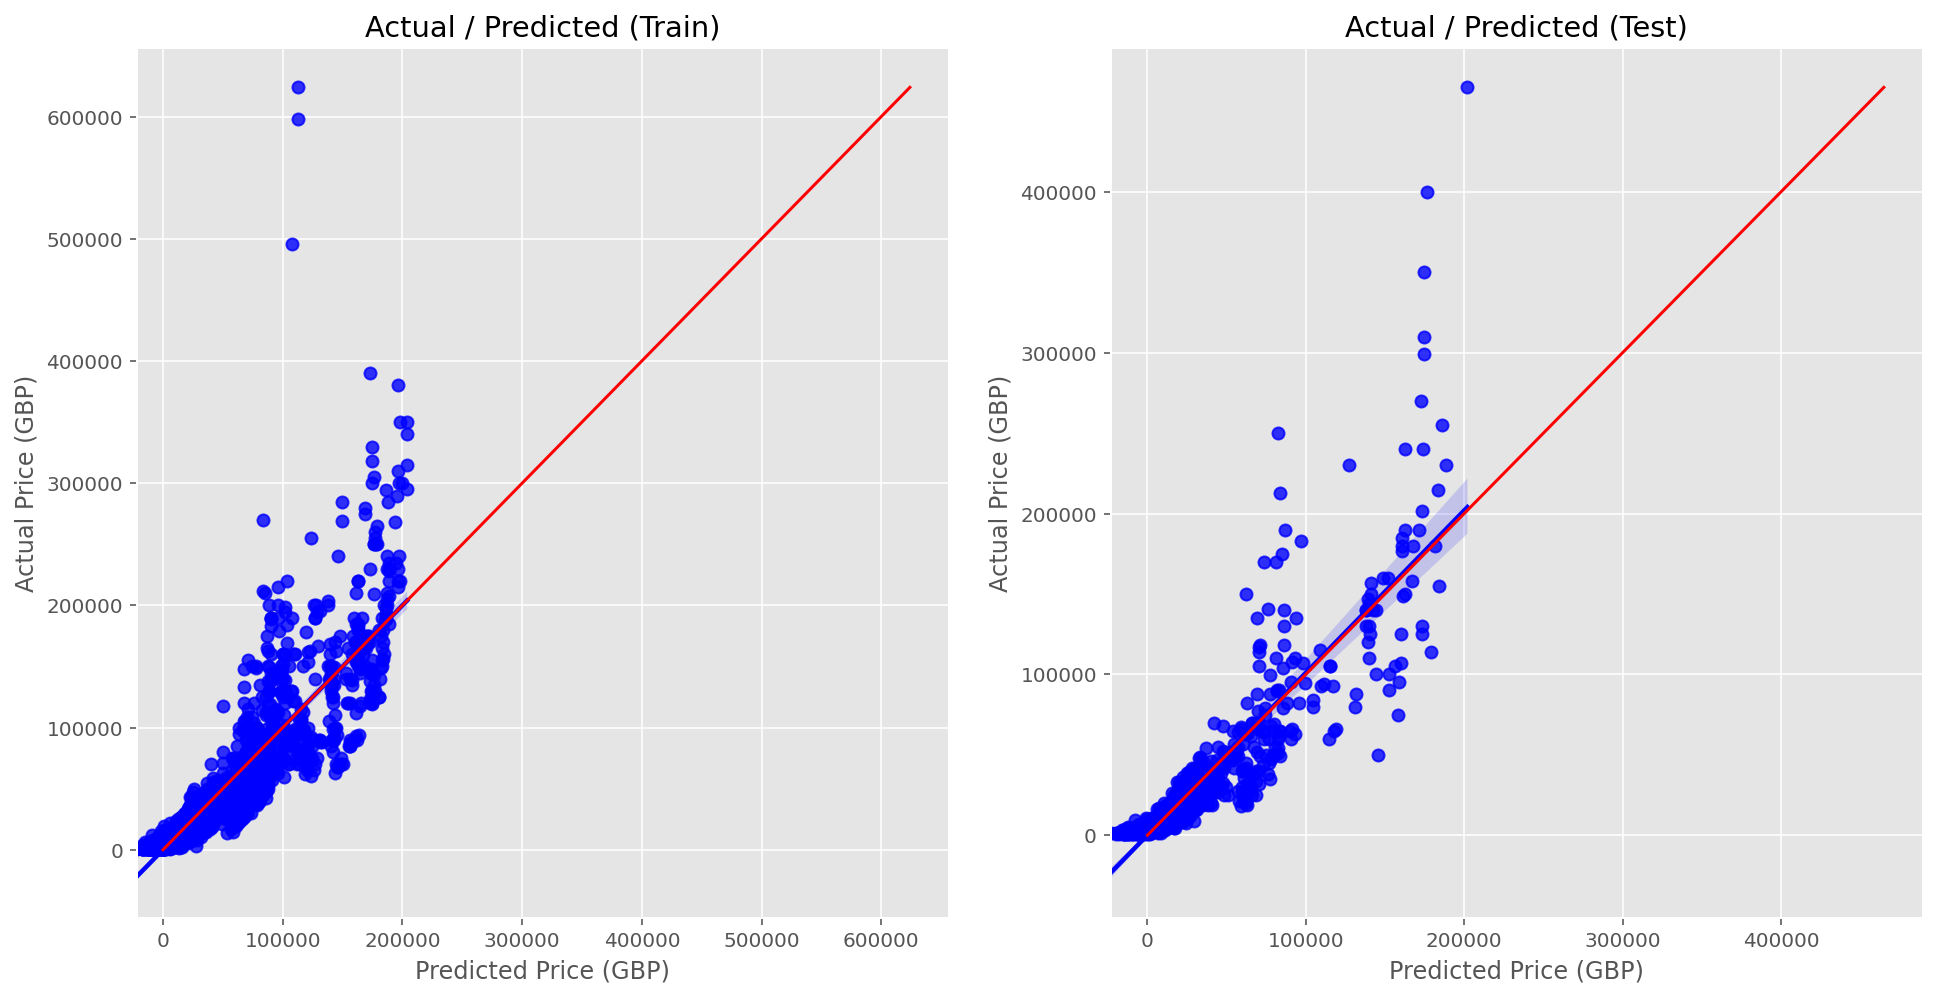

Distribution of residuals:


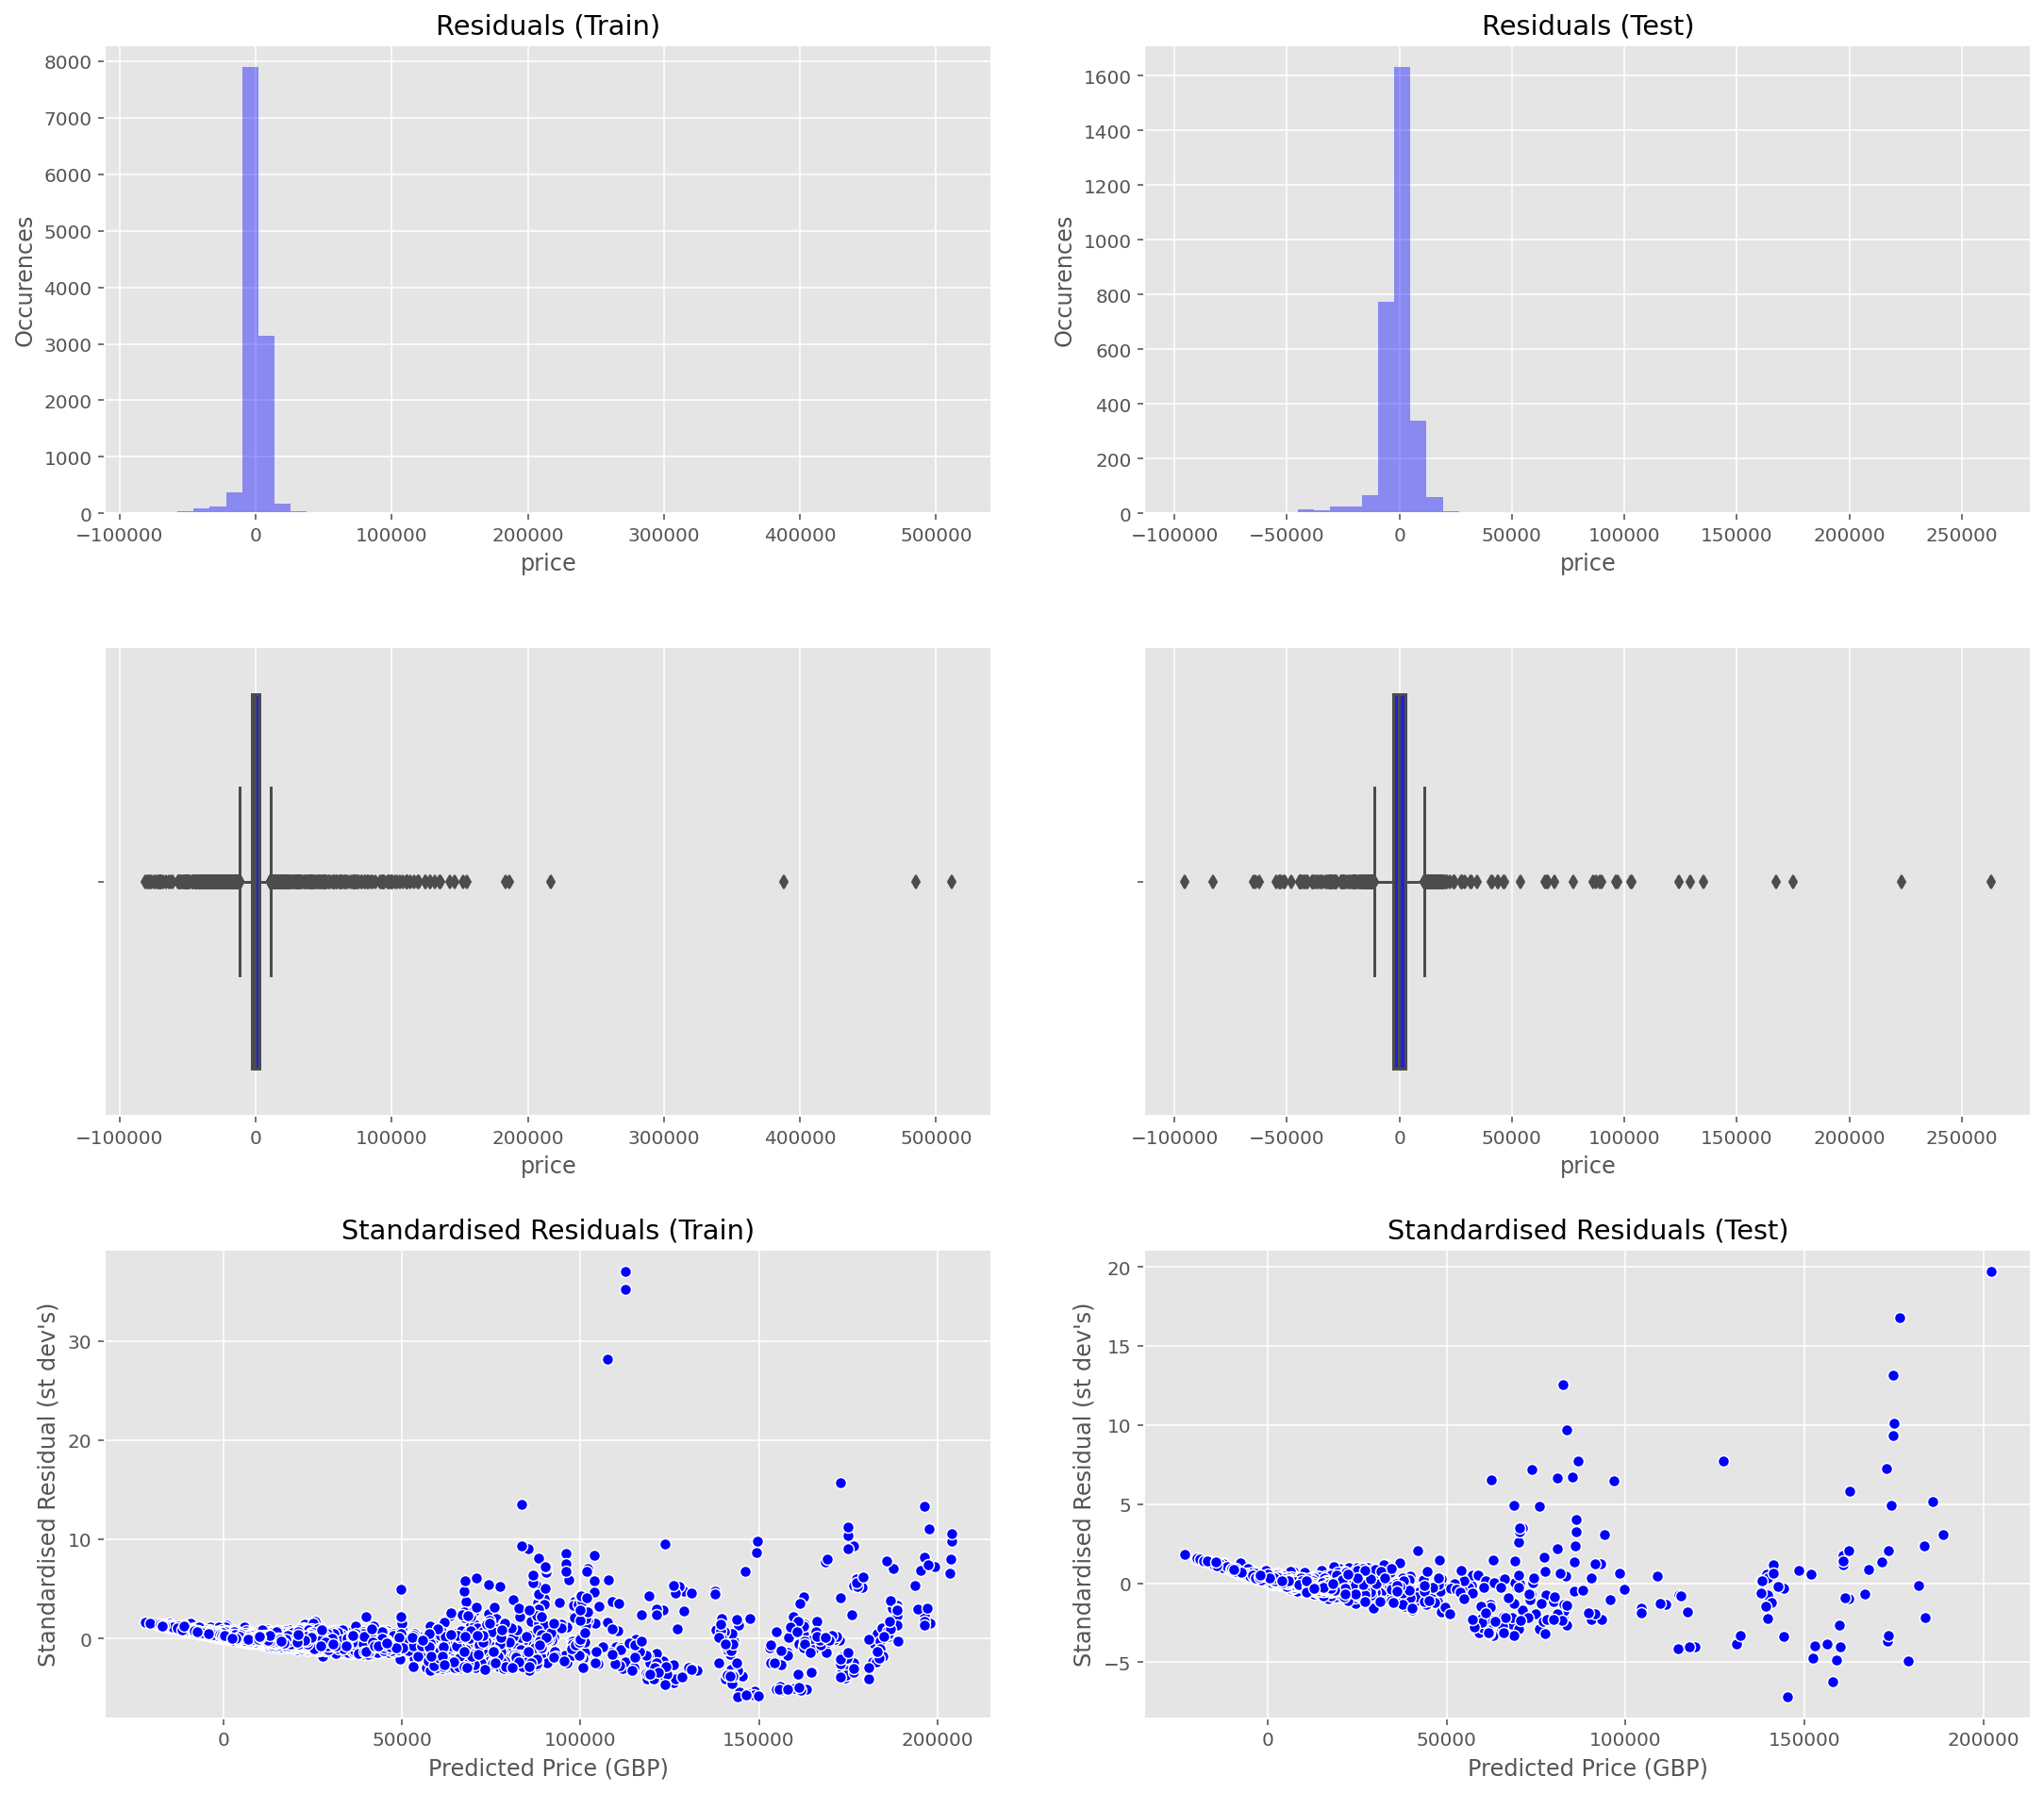

Coefficients:


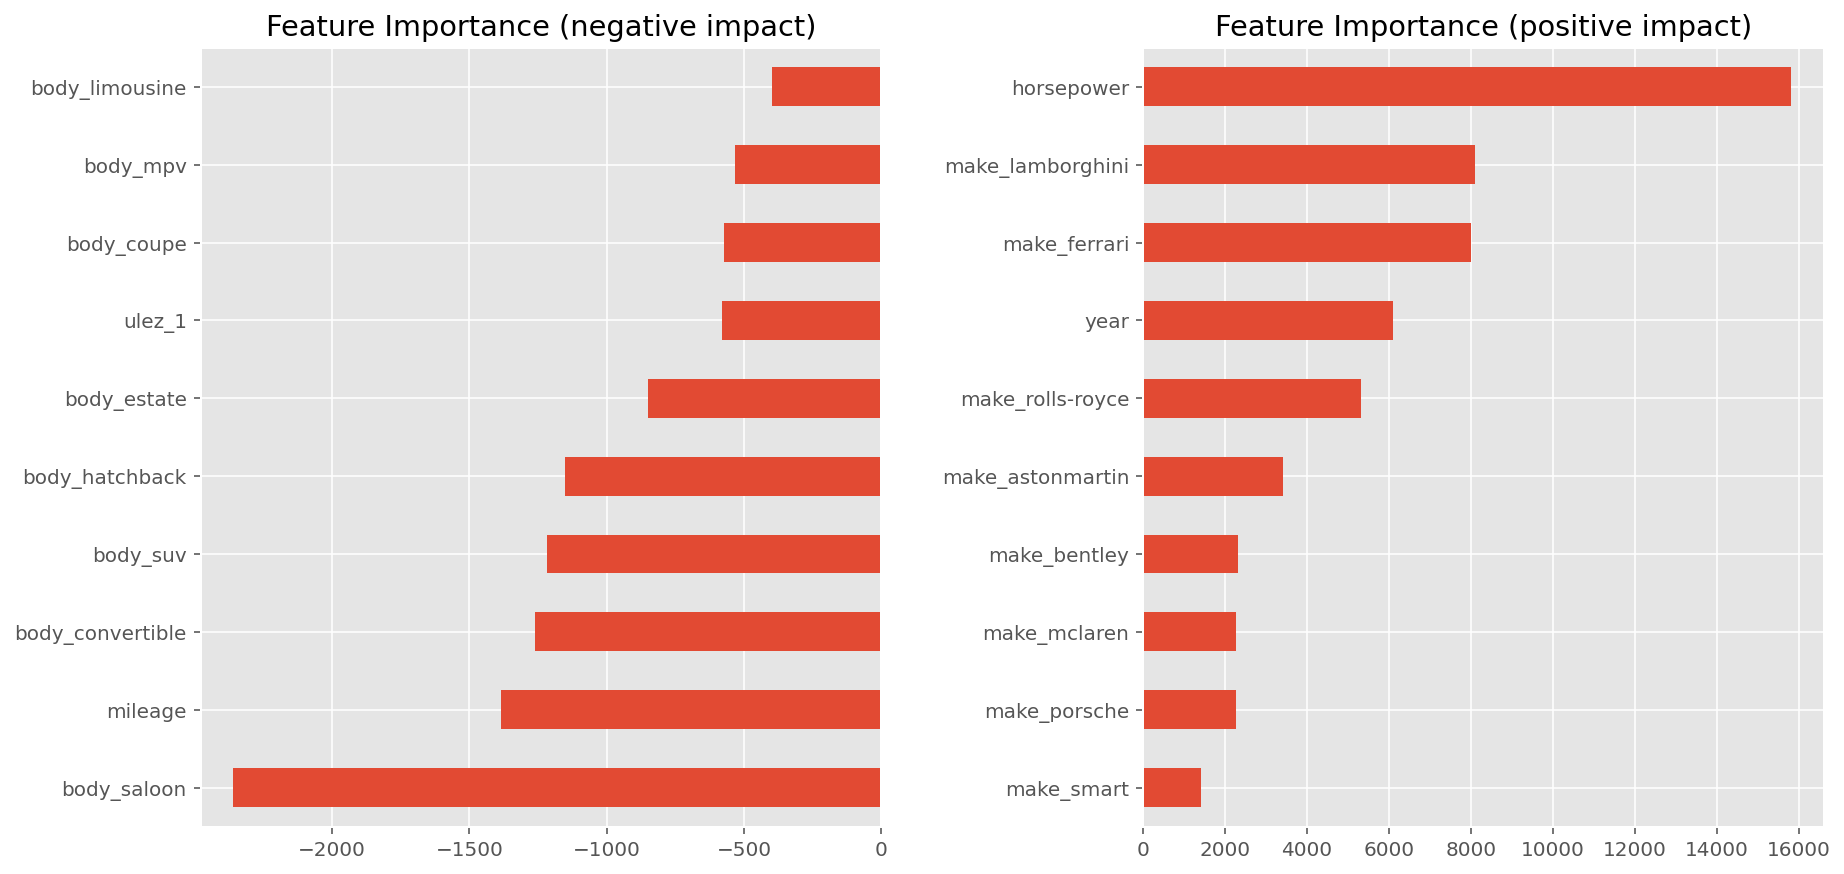

In [65]:
plot_all(ridgecv)

Coefficients:


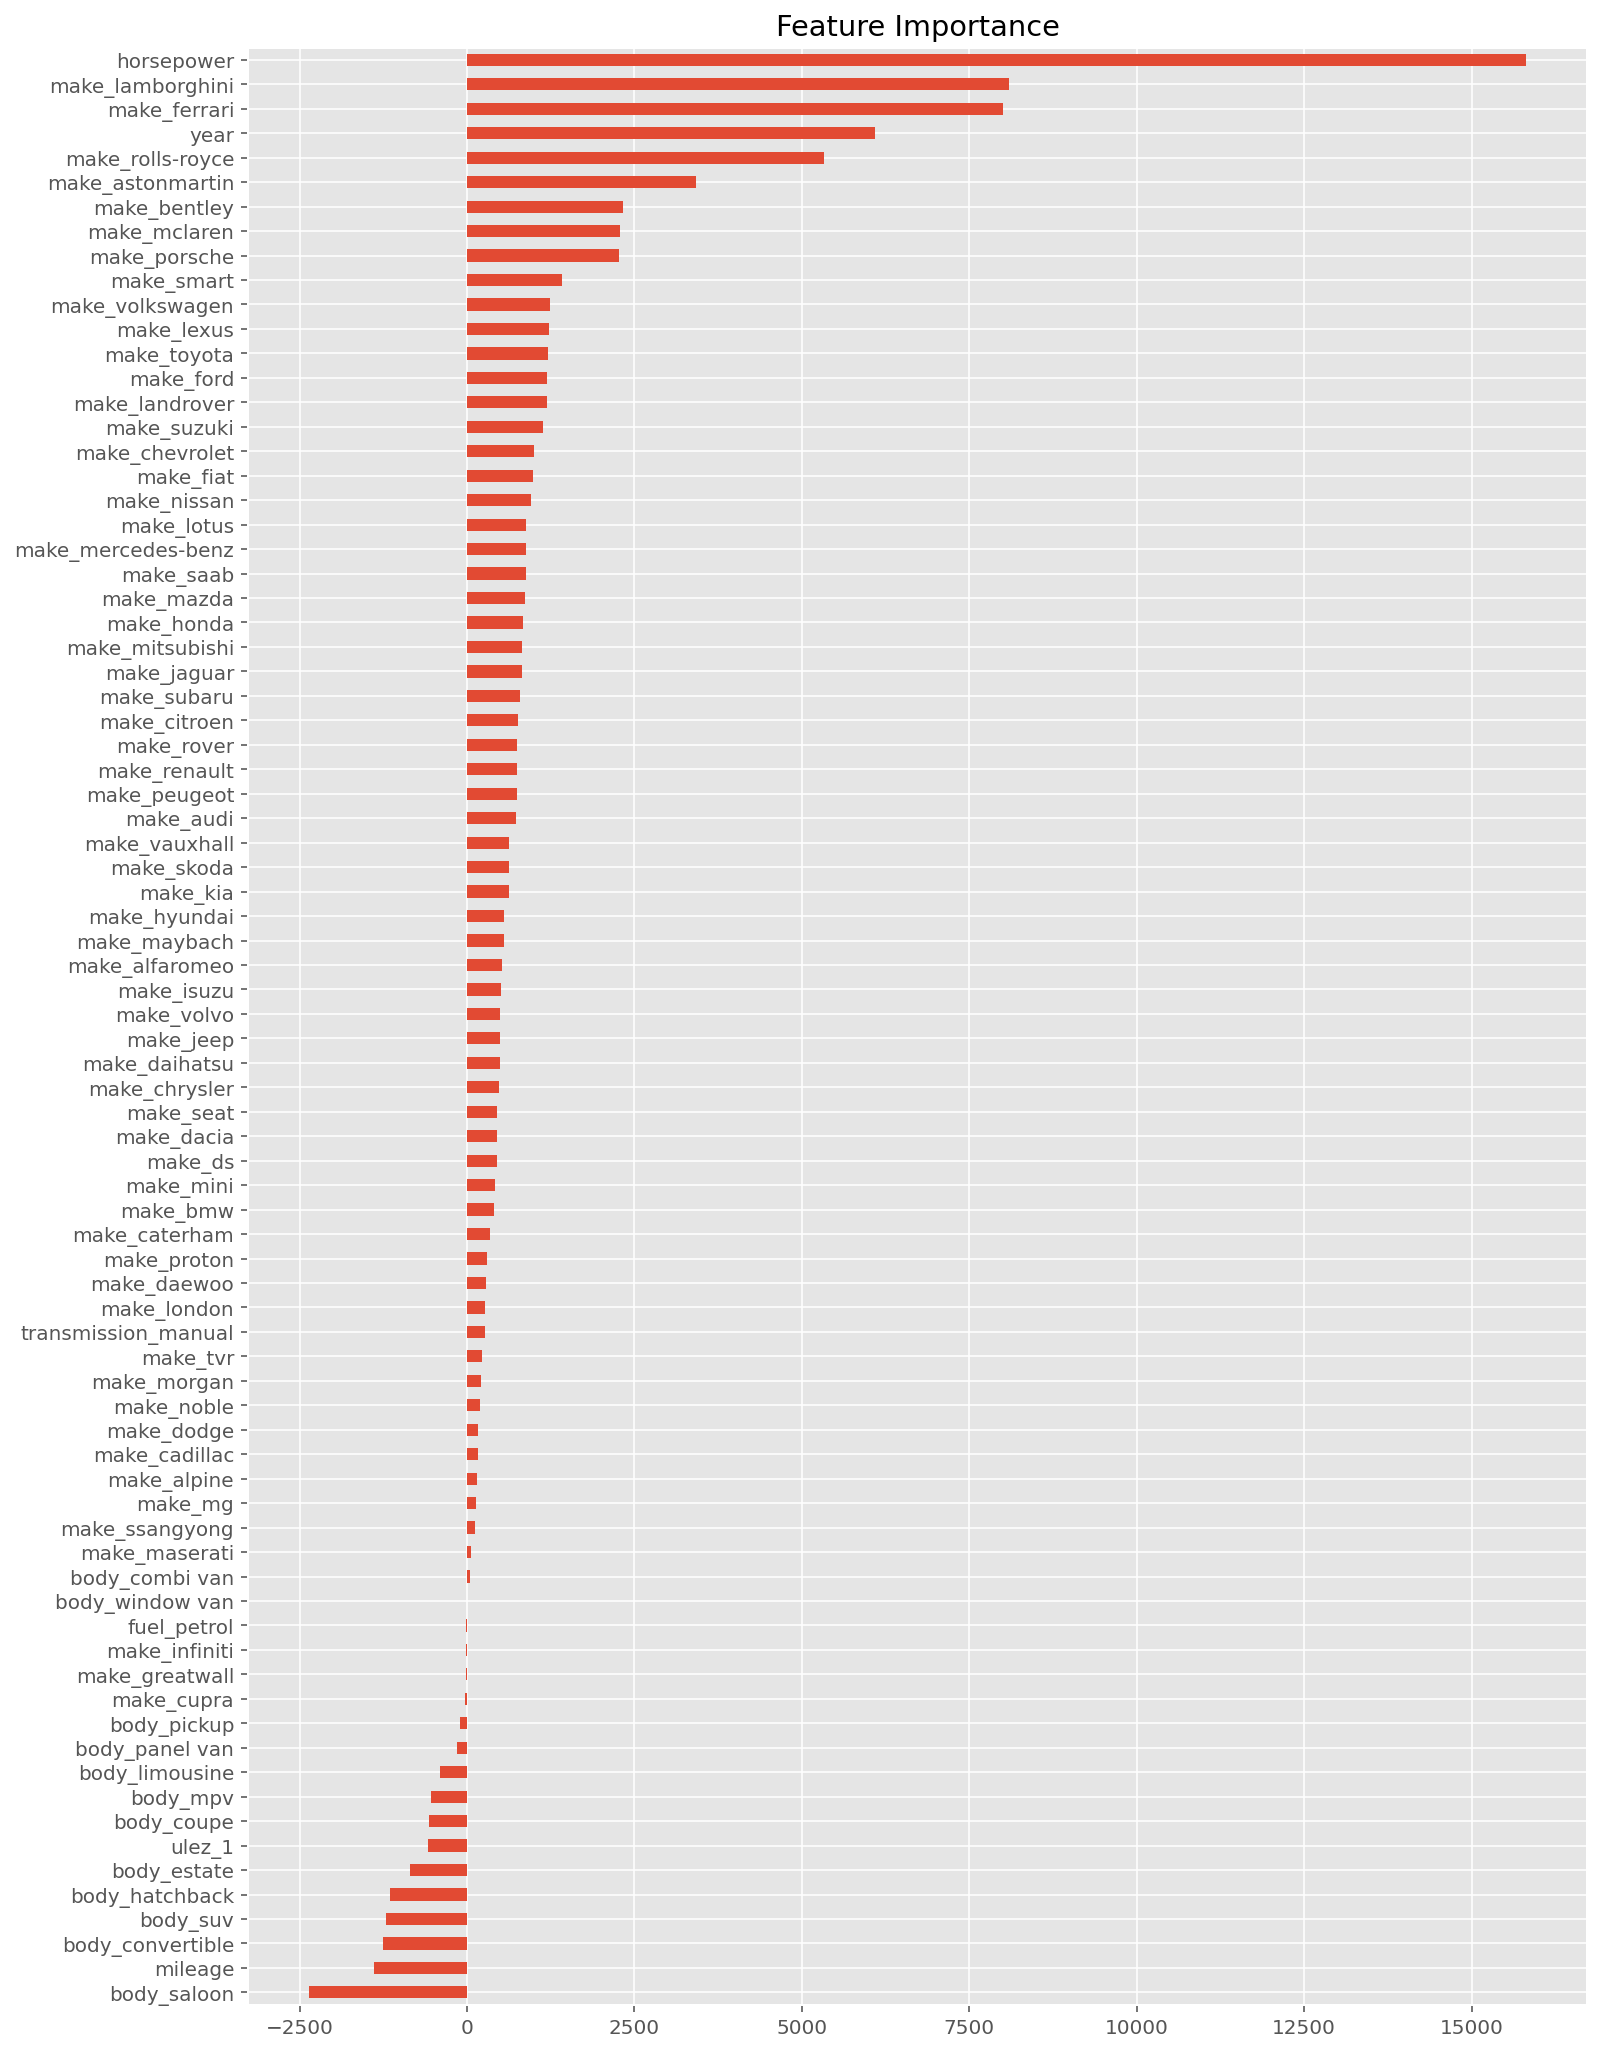

In [66]:
model, train, test = ridgecv, X_train, X_test

# df for model coefficients
df_model_coef = pd.DataFrame(model.coef_, index=train.columns, columns=['coef'])
df_model_coef['coef_abs'] = np.abs(df_model_coef)

# plot coefficients in order of importance
fig, ax = plt.subplots(1,1, figsize=(12,18))
df_model_coef.coef.sort_values()[:].plot(kind='barh', ax=ax)
ax.set_title('Feature Importance')

print('Coefficients:')
plt.show()

# Lasso

In [67]:
lassocv = LassoCV(alphas=np.logspace(-4,4,10), cv=5, max_iter=100000)
lassocv.fit(X_train, y_train)
print_scores(lassocv)

Train score:  0.7859955825959785
Test score:   0.7869314650013289
CV mean:      0.77701902993222


In [38]:
lassocv = LassoCV(alphas=np.logspace(-4,4,10), cv=5, max_iter=100000)
lassocv.fit(X_train, y_train)
print_scores(lassocv)

Train score:  0.7901656146743257
Test score:   0.7950032513468402
CV mean:      0.7809066402616094


Predictions:


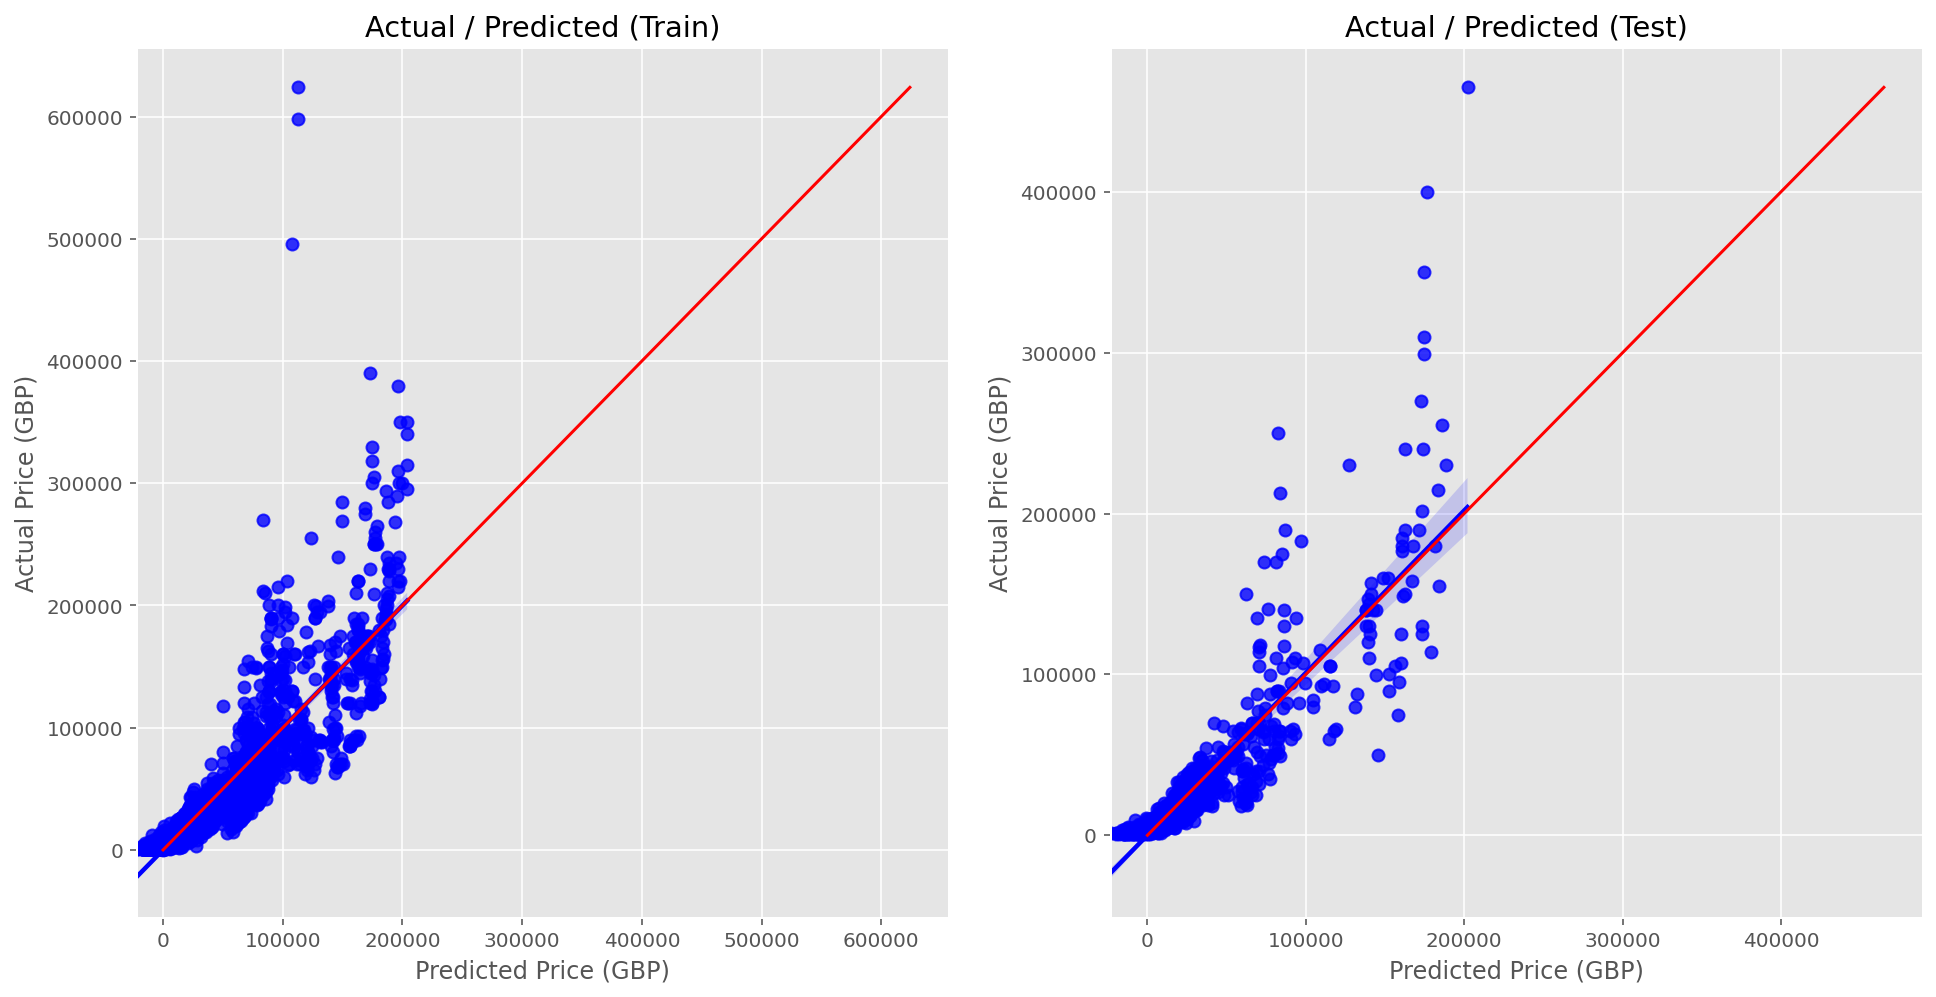

Distribution of residuals:


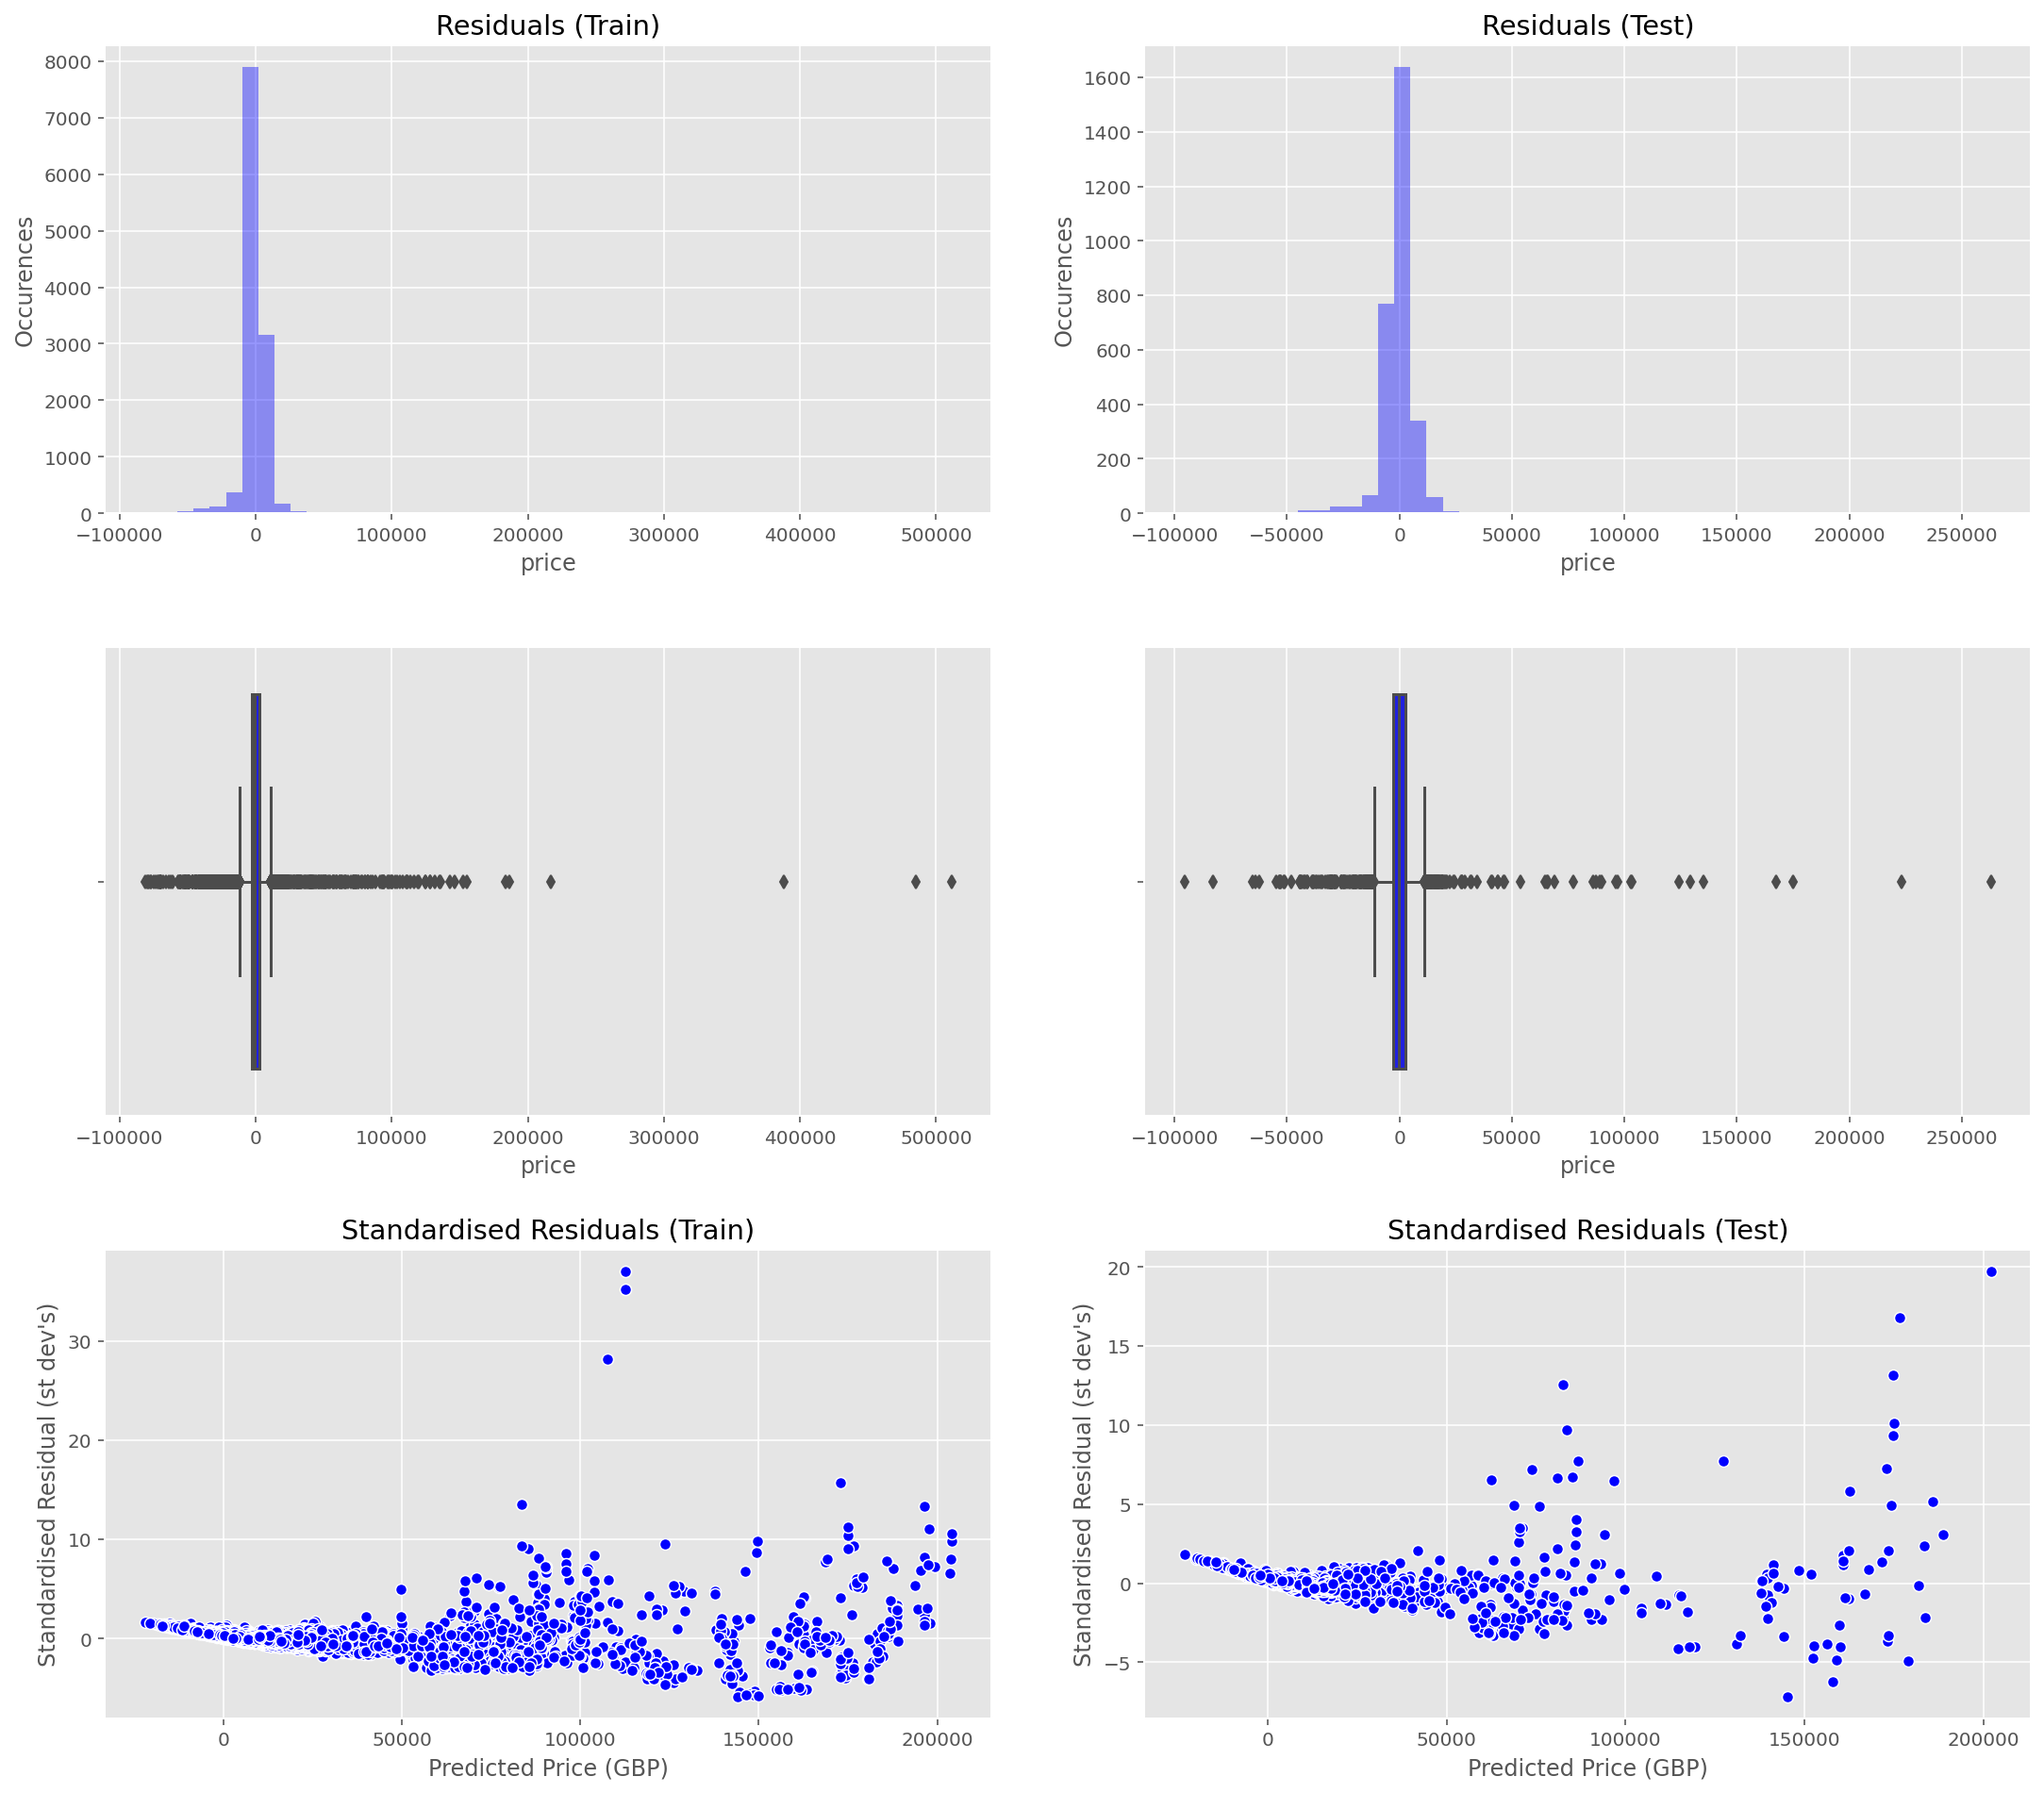

Coefficients:


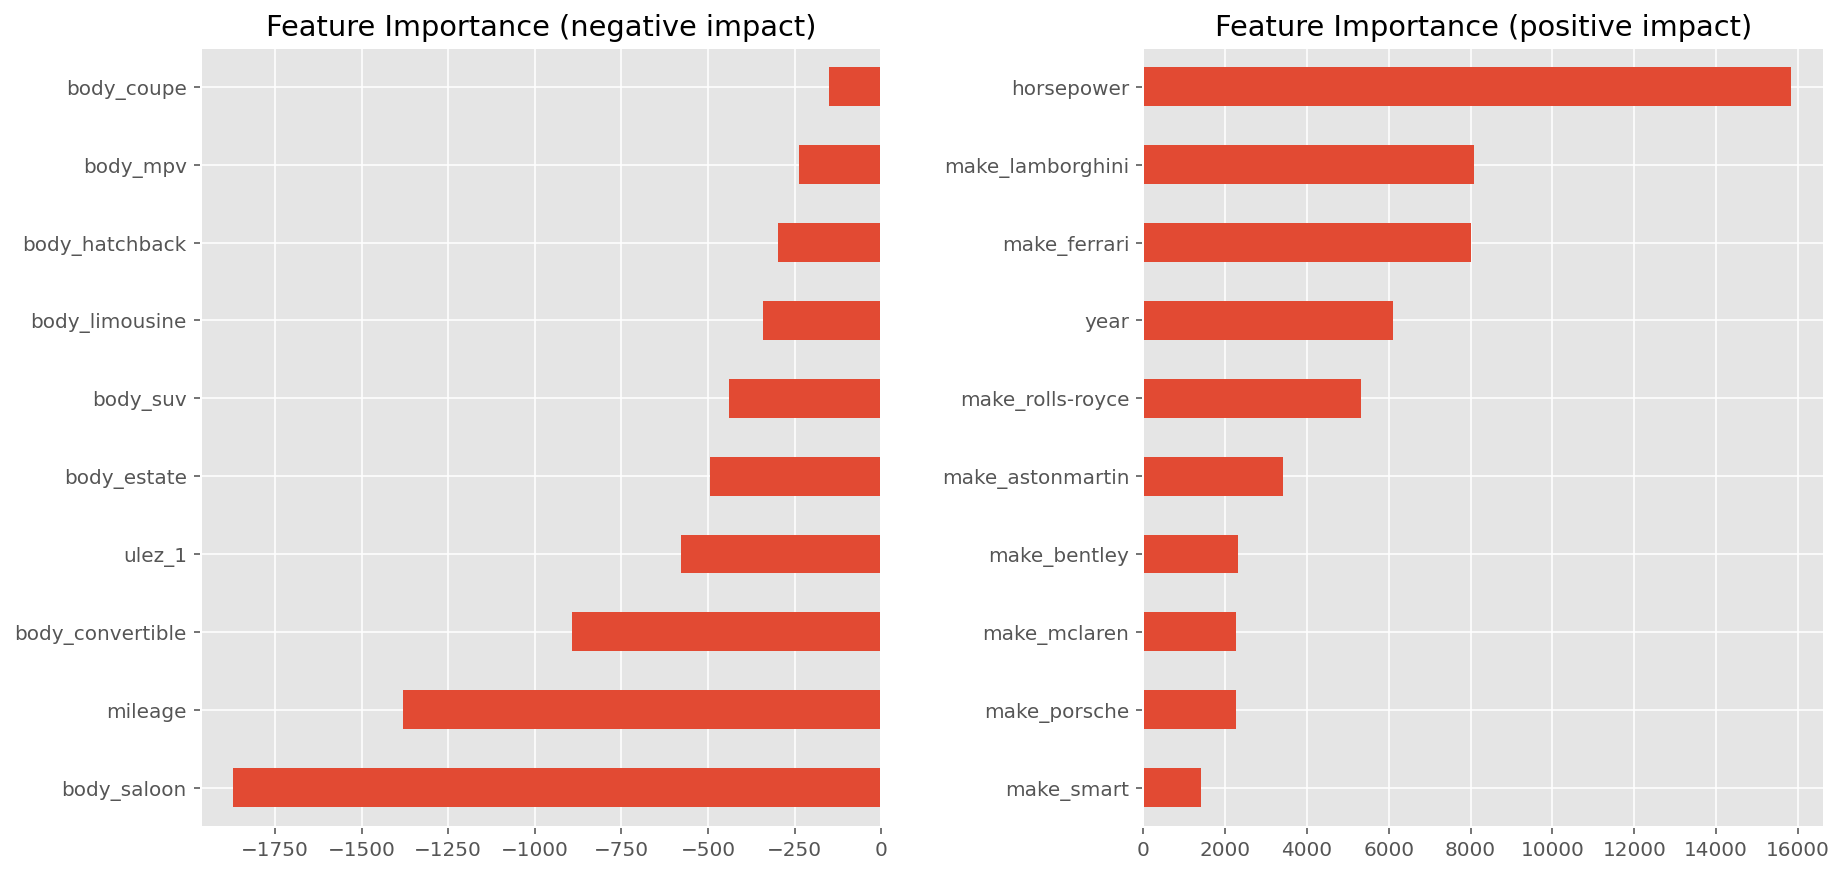

In [68]:
plot_all(lassocv)

Coefficients:


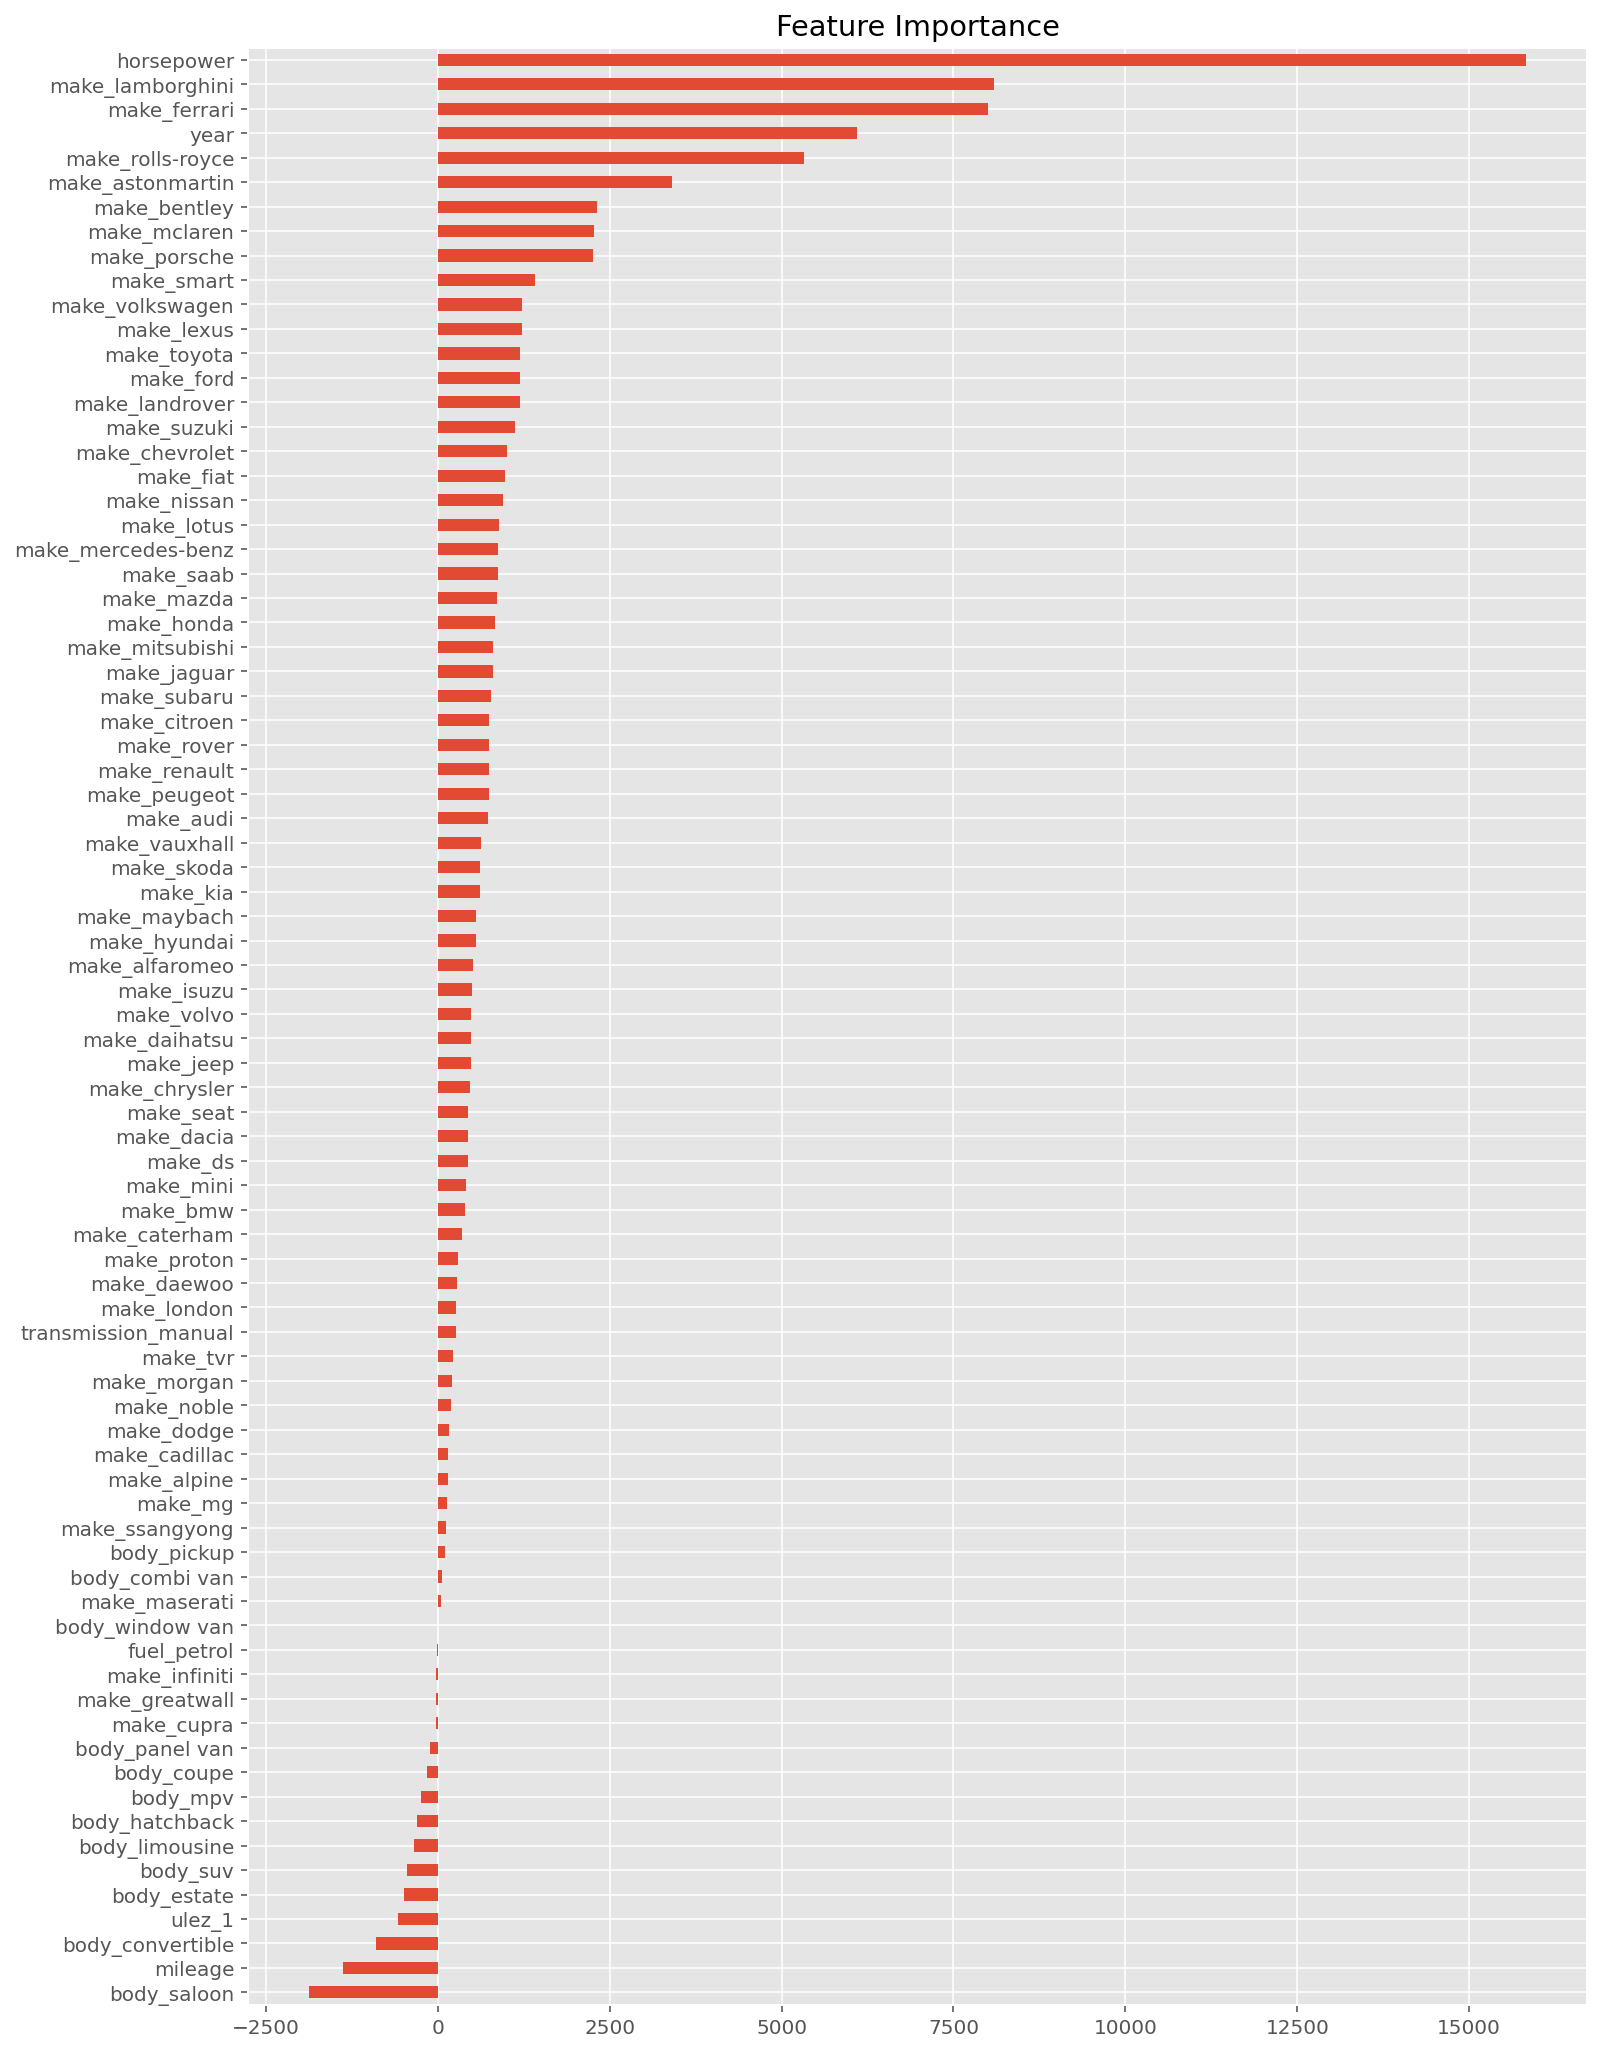

In [69]:
model, train, test = lassocv, X_train, X_test

# df for model coefficients
df_model_coef = pd.DataFrame(model.coef_, index=train.columns, columns=['coef'])
df_model_coef['coef_abs'] = np.abs(df_model_coef)

# plot coefficients in order of importance
fig, ax = plt.subplots(1,1, figsize=(12,18))
df_model_coef.coef.sort_values()[:].plot(kind='barh', ax=ax)
ax.set_title('Feature Importance')

print('Coefficients:')
plt.show()

# ElasticNet

In [51]:
elasticnet = ElasticNetCV(l1_ratio=np.linspace(0.2,1,5), 
                          n_alphas=100, max_iter=1000, cv=5, 
                          verbose=1, n_jobs=-1, random_state=1)

elasticnet.fit(X_train, y_train)
print_scores(elasticnet)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Train score:  0.7895601847608485
Test score:   0.7940214888042062


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


CV mean:      0.7803851533966747


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


Predictions:


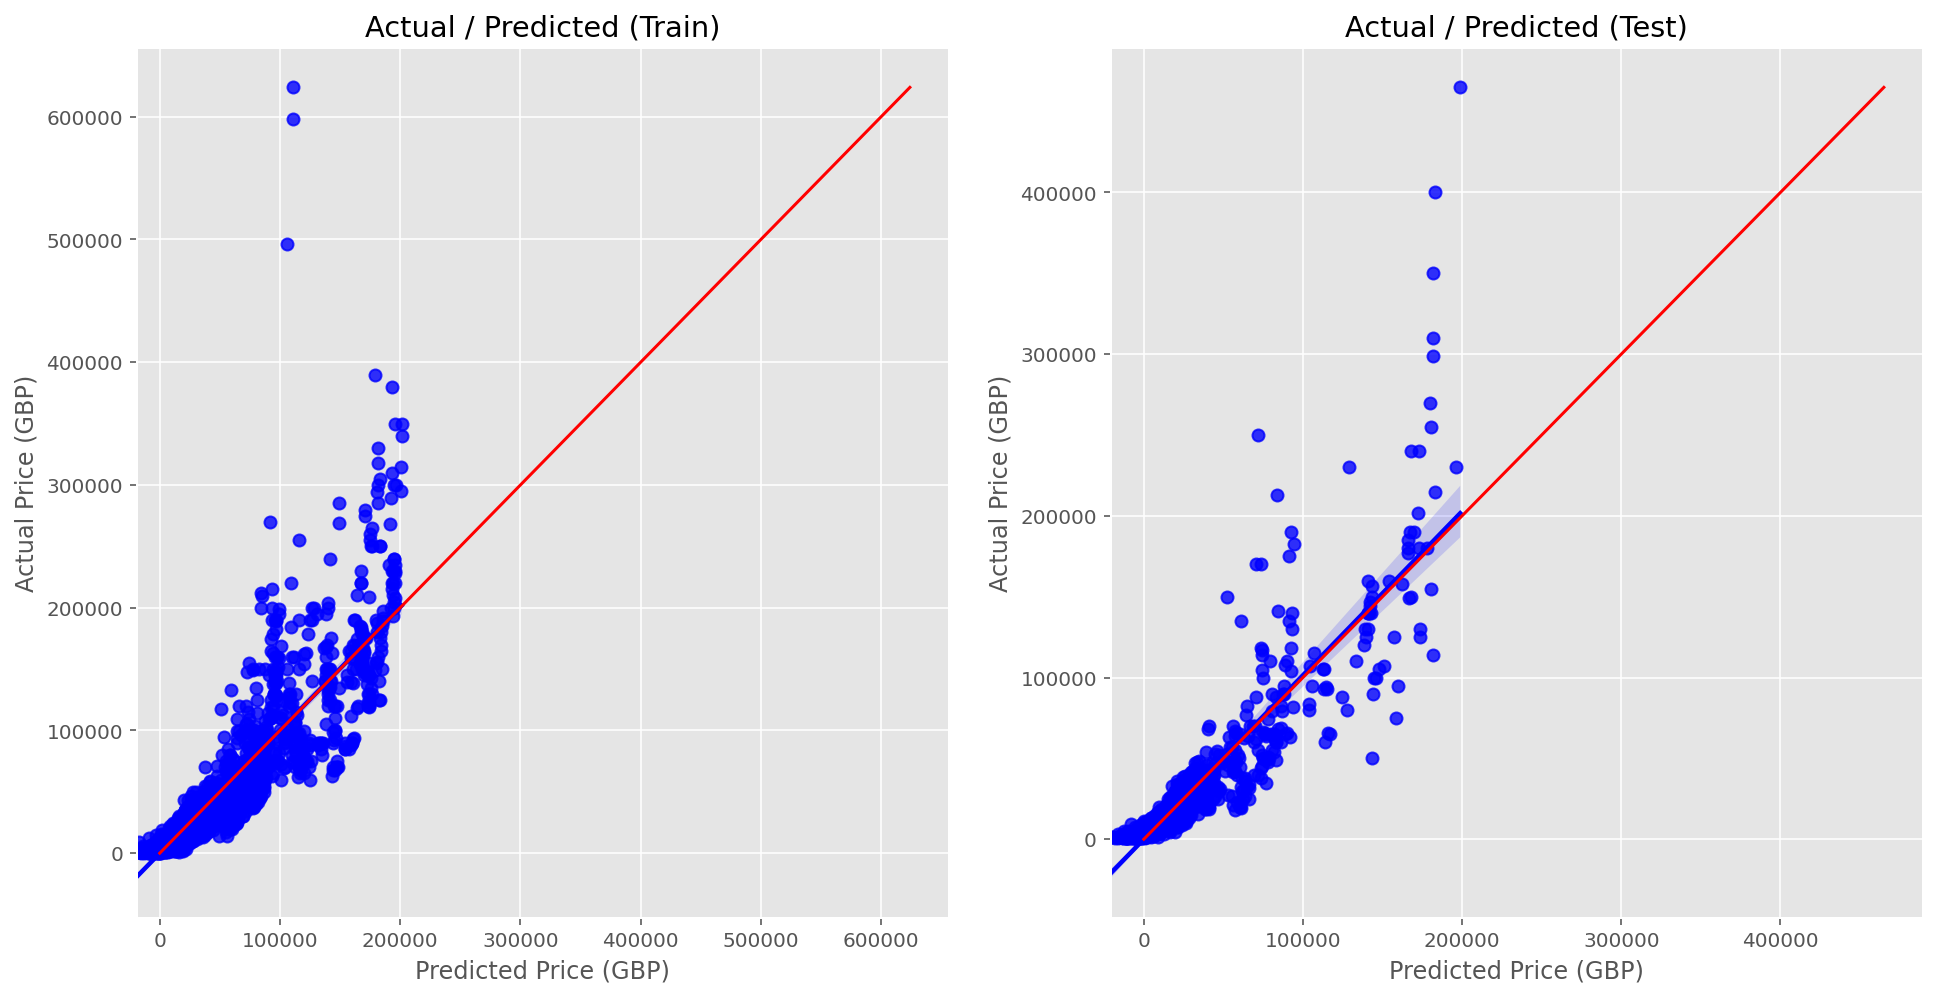

Distribution of residuals:


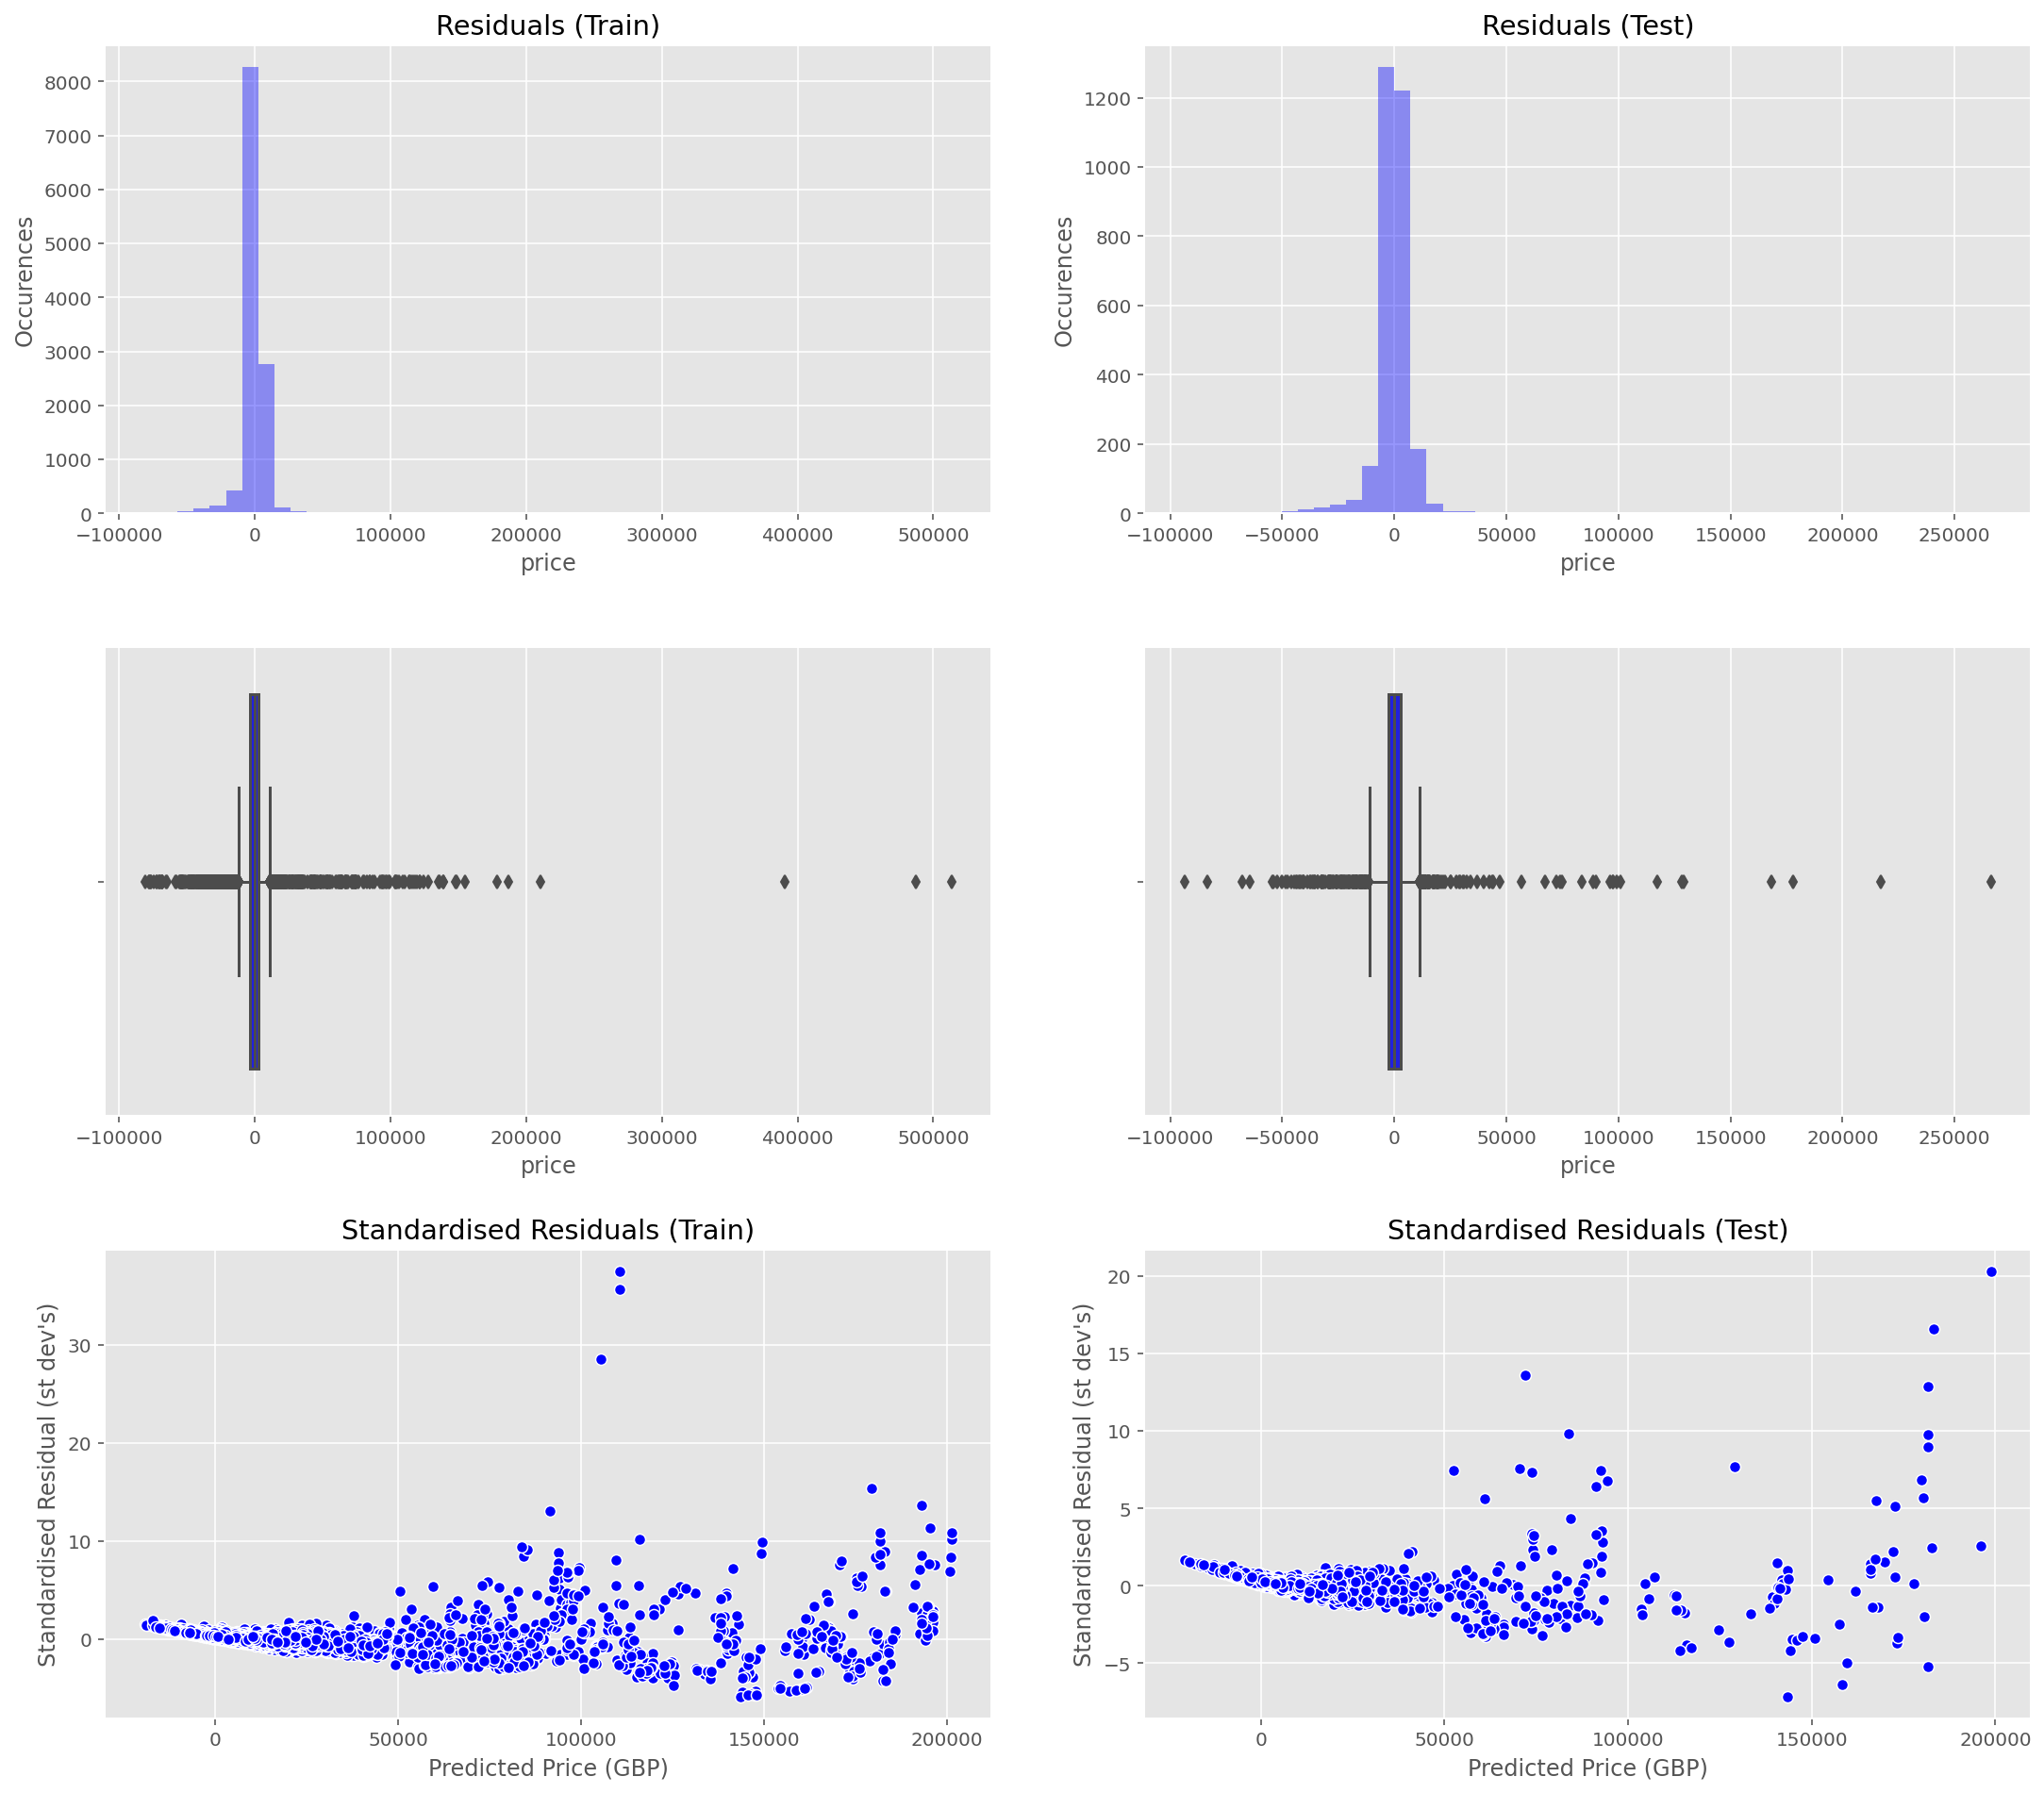

Coefficients:


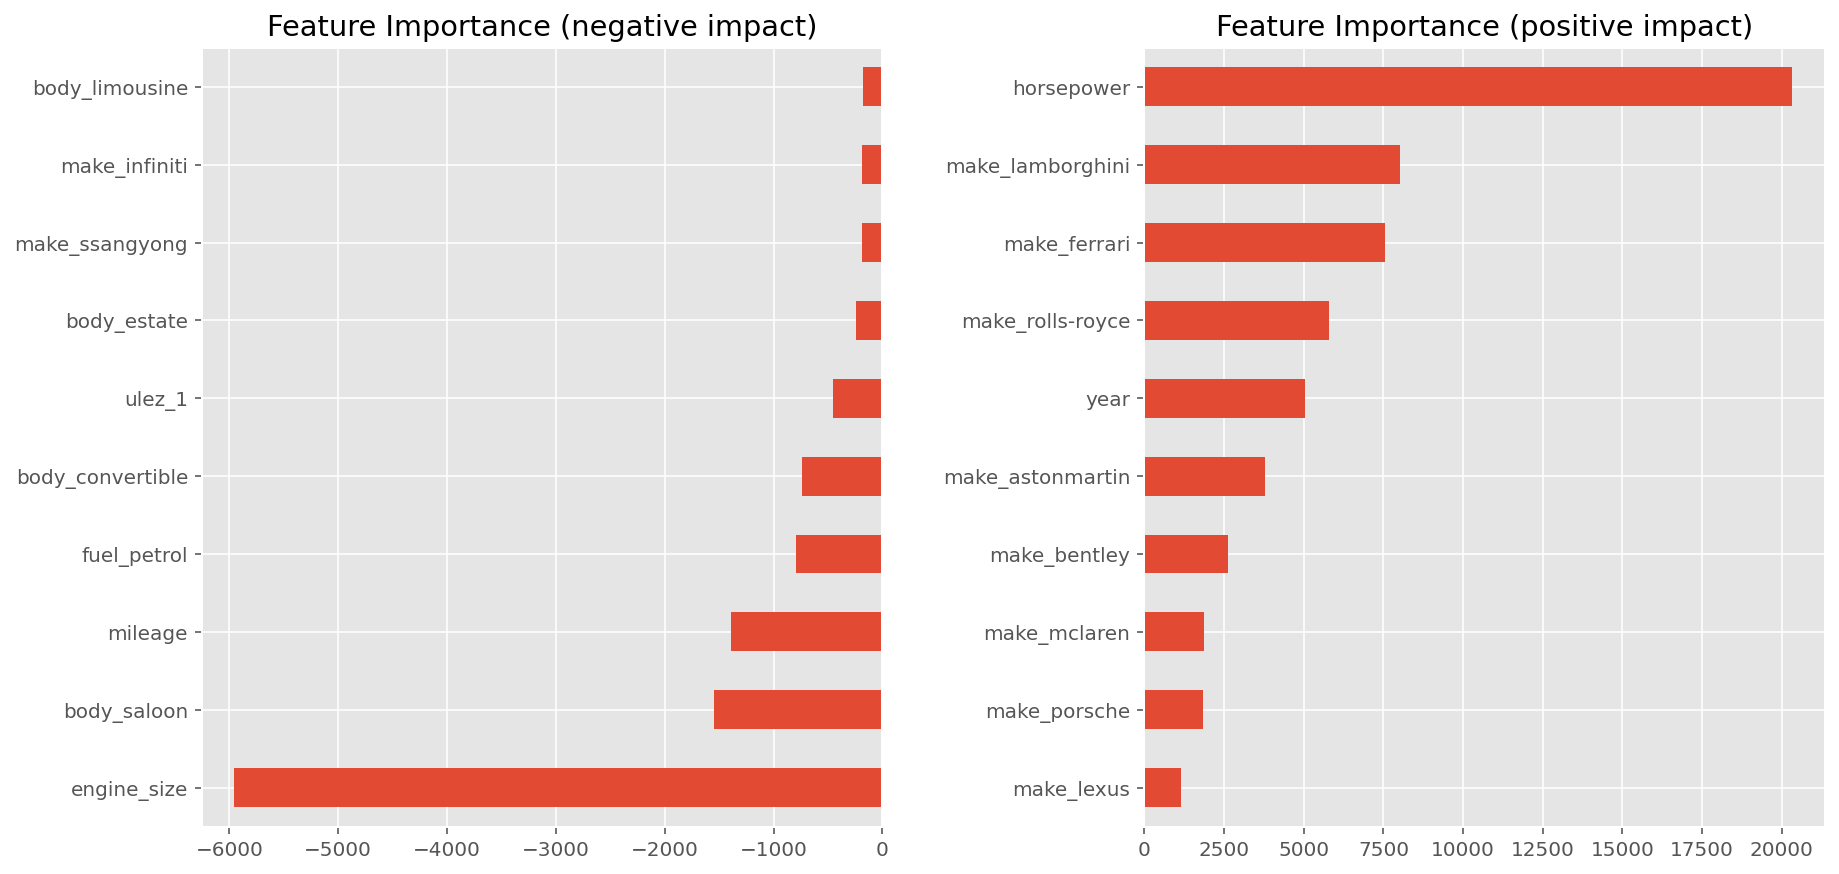

In [55]:
plot_all(elasticnet)

Coefficients:


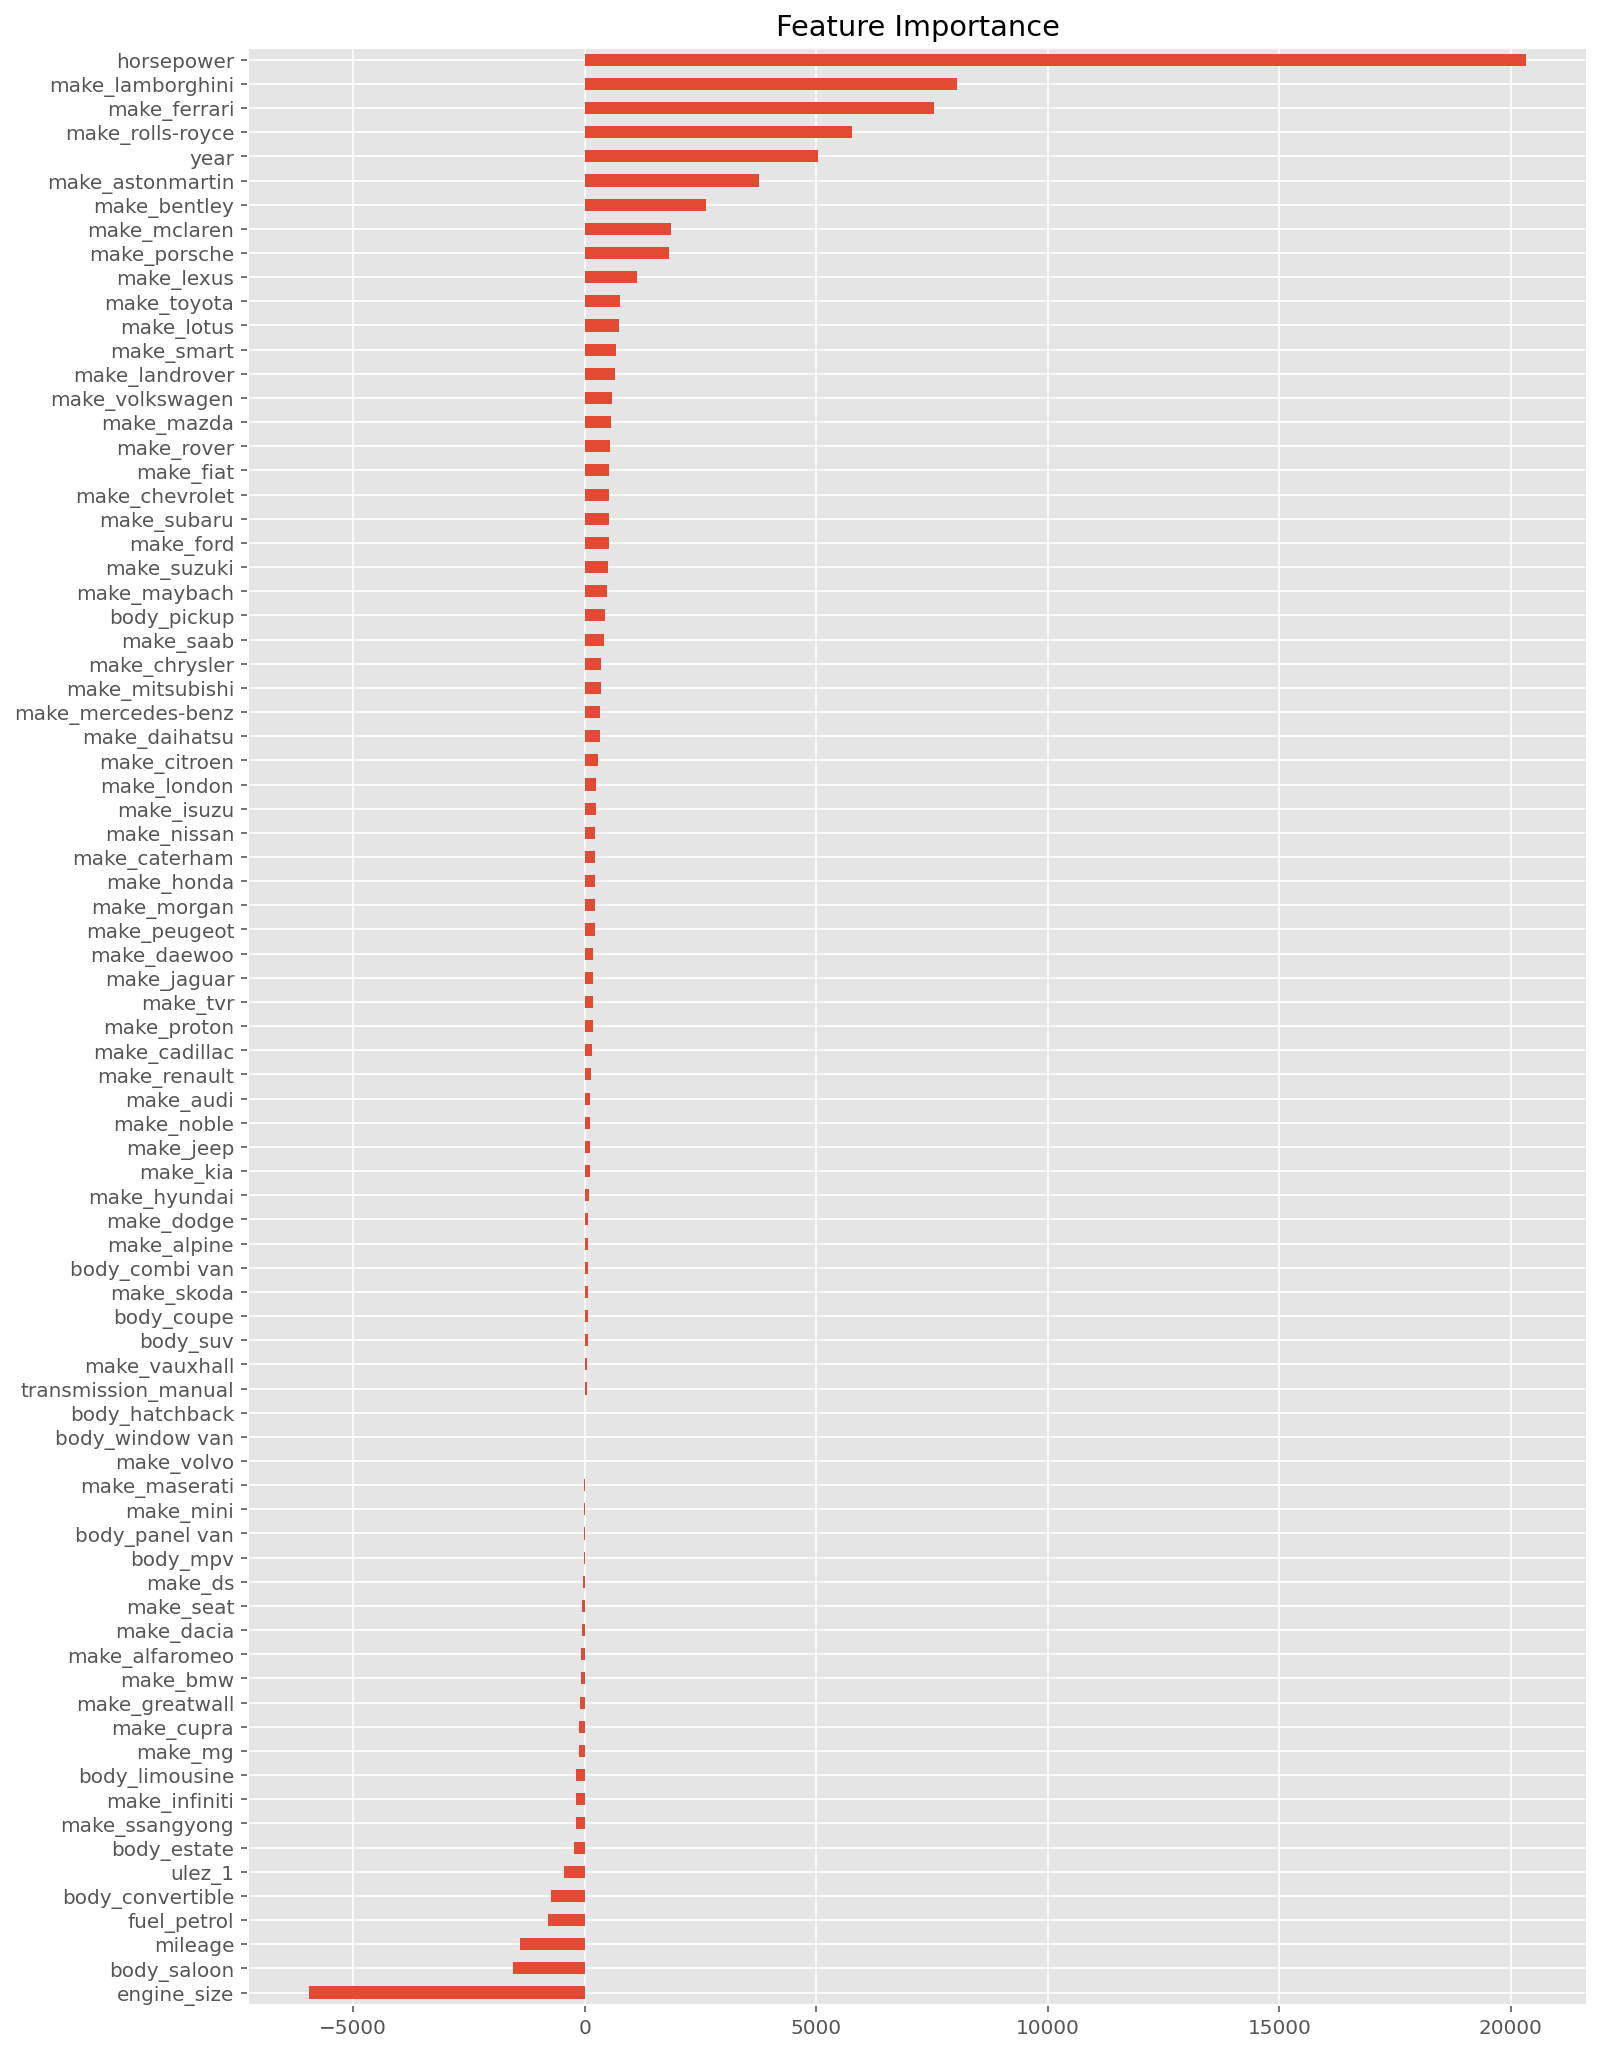

In [56]:
model, train, test = elasticnet, X_train, X_test

# df for model coefficients
df_model_coef = pd.DataFrame(model.coef_, index=train.columns, columns=['coef'])
df_model_coef['coef_abs'] = np.abs(df_model_coef)

# plot coefficients in order of importance
fig, ax = plt.subplots(1,1, figsize=(12,18))
df_model_coef.coef.sort_values()[:].plot(kind='barh', ax=ax)
ax.set_title('Feature Importance')

print('Coefficients:')
plt.show()

#### LinReg (numerical features, no dummification)
---

In [27]:
# set features and target
features_numerical = ['year', 'mileage', 'engine_size', 'horsepower', 'ulez', 'price']
X = df[features_numerical]
X = X.dropna()
y = X.pop('price')

print('feature selection:', features_numerical)
print()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('Train score:', model.score(X_train, y_train))
print('CV mean:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:', model.score(X_test, y_test))

feature selection: ['year', 'mileage', 'engine_size', 'horsepower', 'ulez', 'price']

Train score: 0.6886730675993951
CV mean: 0.6892542586033459
Test score: 0.6586095530874763


#### LinReg (numerical features with high correlation, no dummification)
---

In [28]:
# set features and target
features_highcorr = ['mileage', 'horsepower', 'price']
X = df[features_highcorr]
X = X.dropna()
y = X.pop('price')

print('feature selection:', features_highcorr)
print()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('Train score:', model.score(X_train, y_train))
print('CV mean:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:', model.score(X_test, y_test))

feature selection: ['mileage', 'horsepower', 'price']

Train score: 0.665336873742902
CV mean: 0.6664535775677731
Test score: 0.6975369198111394


In [29]:
# set features and target
features = ['make', 'model', 'year', 'mileage', 'engine_size', 'horsepower', 
            'transmission', 'fuel', 'seller_type', 
            'price']

X = df[features]
X = X.dropna()
y = X.pop('price')

print('feature selection:', features)
print()

# dummification
col_dummify = ['make', 'model', 'transmission', 'fuel', 'seller_type']
X = pd.get_dummies(data=X, columns=col_dummify, drop_first=True)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('Train score:', model.score(X_train, y_train))
print('CV mean:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:', model.score(X_test, y_test))

feature selection: ['make', 'model', 'year', 'mileage', 'engine_size', 'horsepower', 'transmission', 'fuel', 'seller_type', 'price']

Train score: 0.8823588357921615
CV mean: -2.0956967274623556e+27
Test score: -2.72063125159328e+24


In [30]:
# set features and target
features = ['make', 'year', 'mileage', 'engine_size', 'horsepower', 
            'transmission', 'fuel', 'seller_type', 
            'price']

X = df[features]
X = X.dropna()
y = X.pop('price')

print('feature selection:', features)
print()

# dummification
col_dummify = ['make', 'transmission', 'fuel', 'seller_type']
X = pd.get_dummies(data=X, columns=col_dummify, drop_first=True)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('Train score:', model.score(X_train, y_train))
print('CV mean:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:', model.score(X_test, y_test))

feature selection: ['make', 'year', 'mileage', 'engine_size', 'horsepower', 'transmission', 'fuel', 'seller_type', 'price']

Train score: 0.8031018637139642
CV mean: -2.5486890945194995e+22
Test score: -7.047623131583912e+17


#### LinReg (Ridge)
---

feature selection: ['year', 'mileage', 'engine_size', 'horsepower', 'ulez', 'price']

Best alpha:	 2.782559402207126

Train score:	 0.6886726045095808
CV mean:	 0.6892552003921906
Test score:	 0.6585820640553451


,coefficients,coef_abs
year,2058.079774,2058.079774
mileage,-4228.719707,4228.719707
engine_size,-6154.927547,6154.927547
horsepower,28852.082196,28852.082196
ulez,-536.930196,536.930196


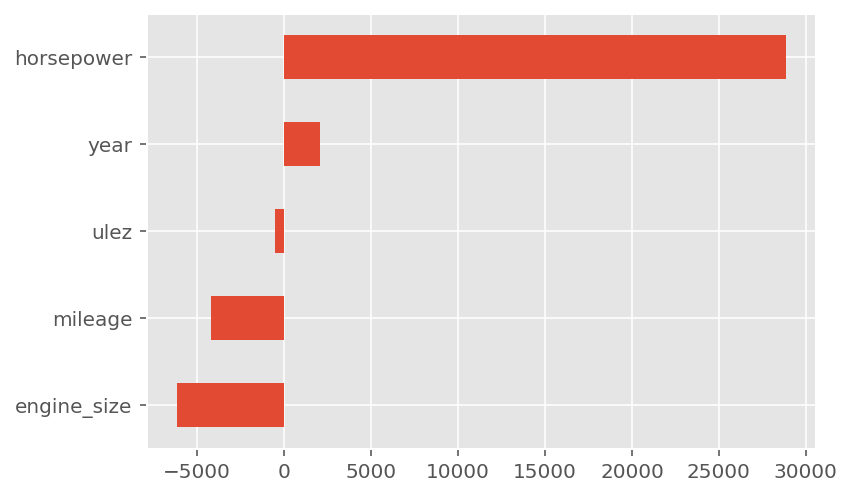

In [31]:
# set features and target
features_numerical = ['year', 'mileage', 'engine_size', 'horsepower', 'ulez', 'price']
X = df[features_numerical]
X = X.dropna()
y = X.pop('price')

print('feature selection:', features_numerical)
print()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

model = RidgeCV(alphas=(np.logspace(-4,4,10)), cv=5)
model.fit(X_train, y_train)

print('Best alpha:\t', model.alpha_)
print()

model = Ridge(alpha=model.alpha_, max_iter=100000, random_state=1)
model.fit(X_train, y_train)

print('Train score:\t', model.score(X_train, y_train))
print('CV mean:\t', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:\t', model.score(X_test, y_test))

# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
display(df_coef)

# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

#### Lasso
---

Best alpha:	 2.782559402207126

Train score:	 0.6886728198204433
CV mean:	 0.6892546882373383
Test score:	 0.6585984228908346


,coefficients,coef_abs
year,2053.619804,2053.619804
mileage,-4225.216325,4225.216325
engine_size,-6170.040577,6170.040577
horsepower,28869.720955,28869.720955
ulez,-532.459110,532.459110


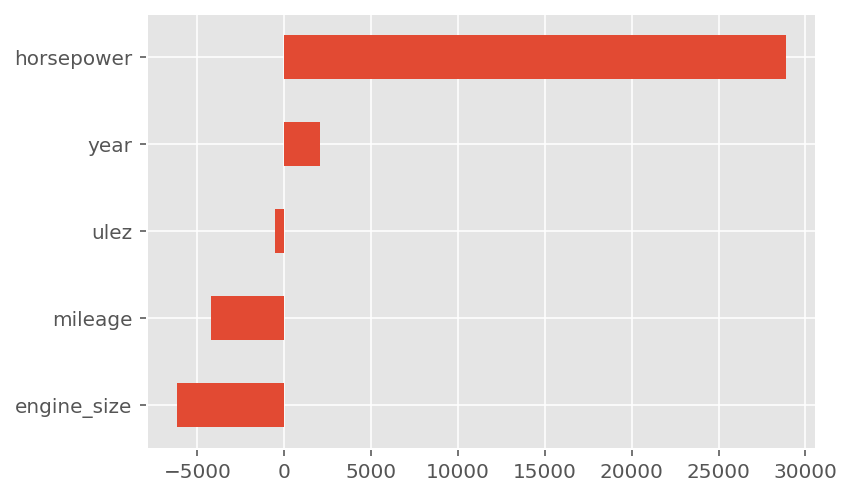

In [32]:
model = LassoCV(alphas=np.logspace(-4,4,10), cv=5)

model.fit(X_train, y_train)

print('Best alpha:\t', model.alpha_)
print()

model = Lasso(alpha=model.alpha_, max_iter=100000, random_state=1)
model.fit(X_train, y_train)

print('Train score:\t', model.score(X_train, y_train))
print('CV mean:\t', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test score:\t', model.score(X_test, y_test))

# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
display(df_coef)

# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');